<a href="https://colab.research.google.com/github/Jitisha1122/Predictive-Air-Quality-Assessment-and-Monitoring/blob/main/Project_INT_422_Main1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#Reading Dataset
df = pd.read_csv('city_day.csv', encoding='unicode_escape')


In [ ]:
#Loading Dataset
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
#check the shape of the dataset
df.shape

(29531, 16)

In [ ]:
#Check the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
#Checking the missing values present in the dataset
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
#Checking the numeric values present in the dataset
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
#Checking th eunique values present in the dataset
df.nunique()

,0
City,26
Date,2009
PM2.5,11716
PM10,12571
NO,5776
NO2,7404
NOx,8156
NH3,5922
CO,1779
SO2,4761


In [ ]:
#All the columns present in the dataset
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

Data Visualization

In [ ]:
sns.pairplot(data=df)

In [ ]:
#checking the count of the values present in state column
df['City'].value_counts()

,count
City,
Ahmedabad,2009
Bengaluru,2009
Chennai,2009
Mumbai,2009
Lucknow,2009
Delhi,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


[]

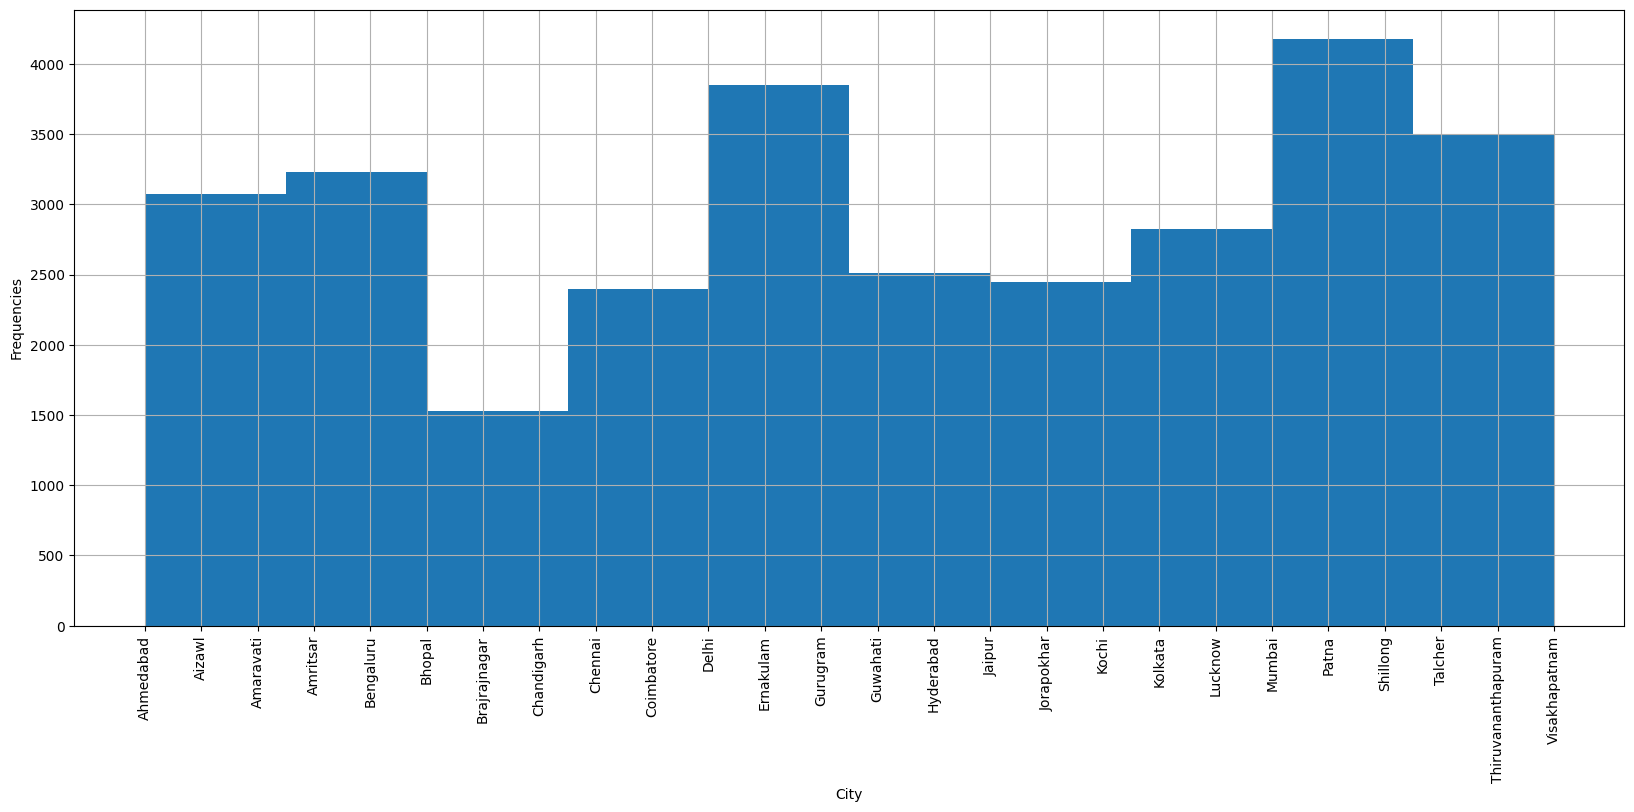

In [ ]:
#Visualization shows the count of the states present in the dataset
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
df.City.hist()
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.plot()

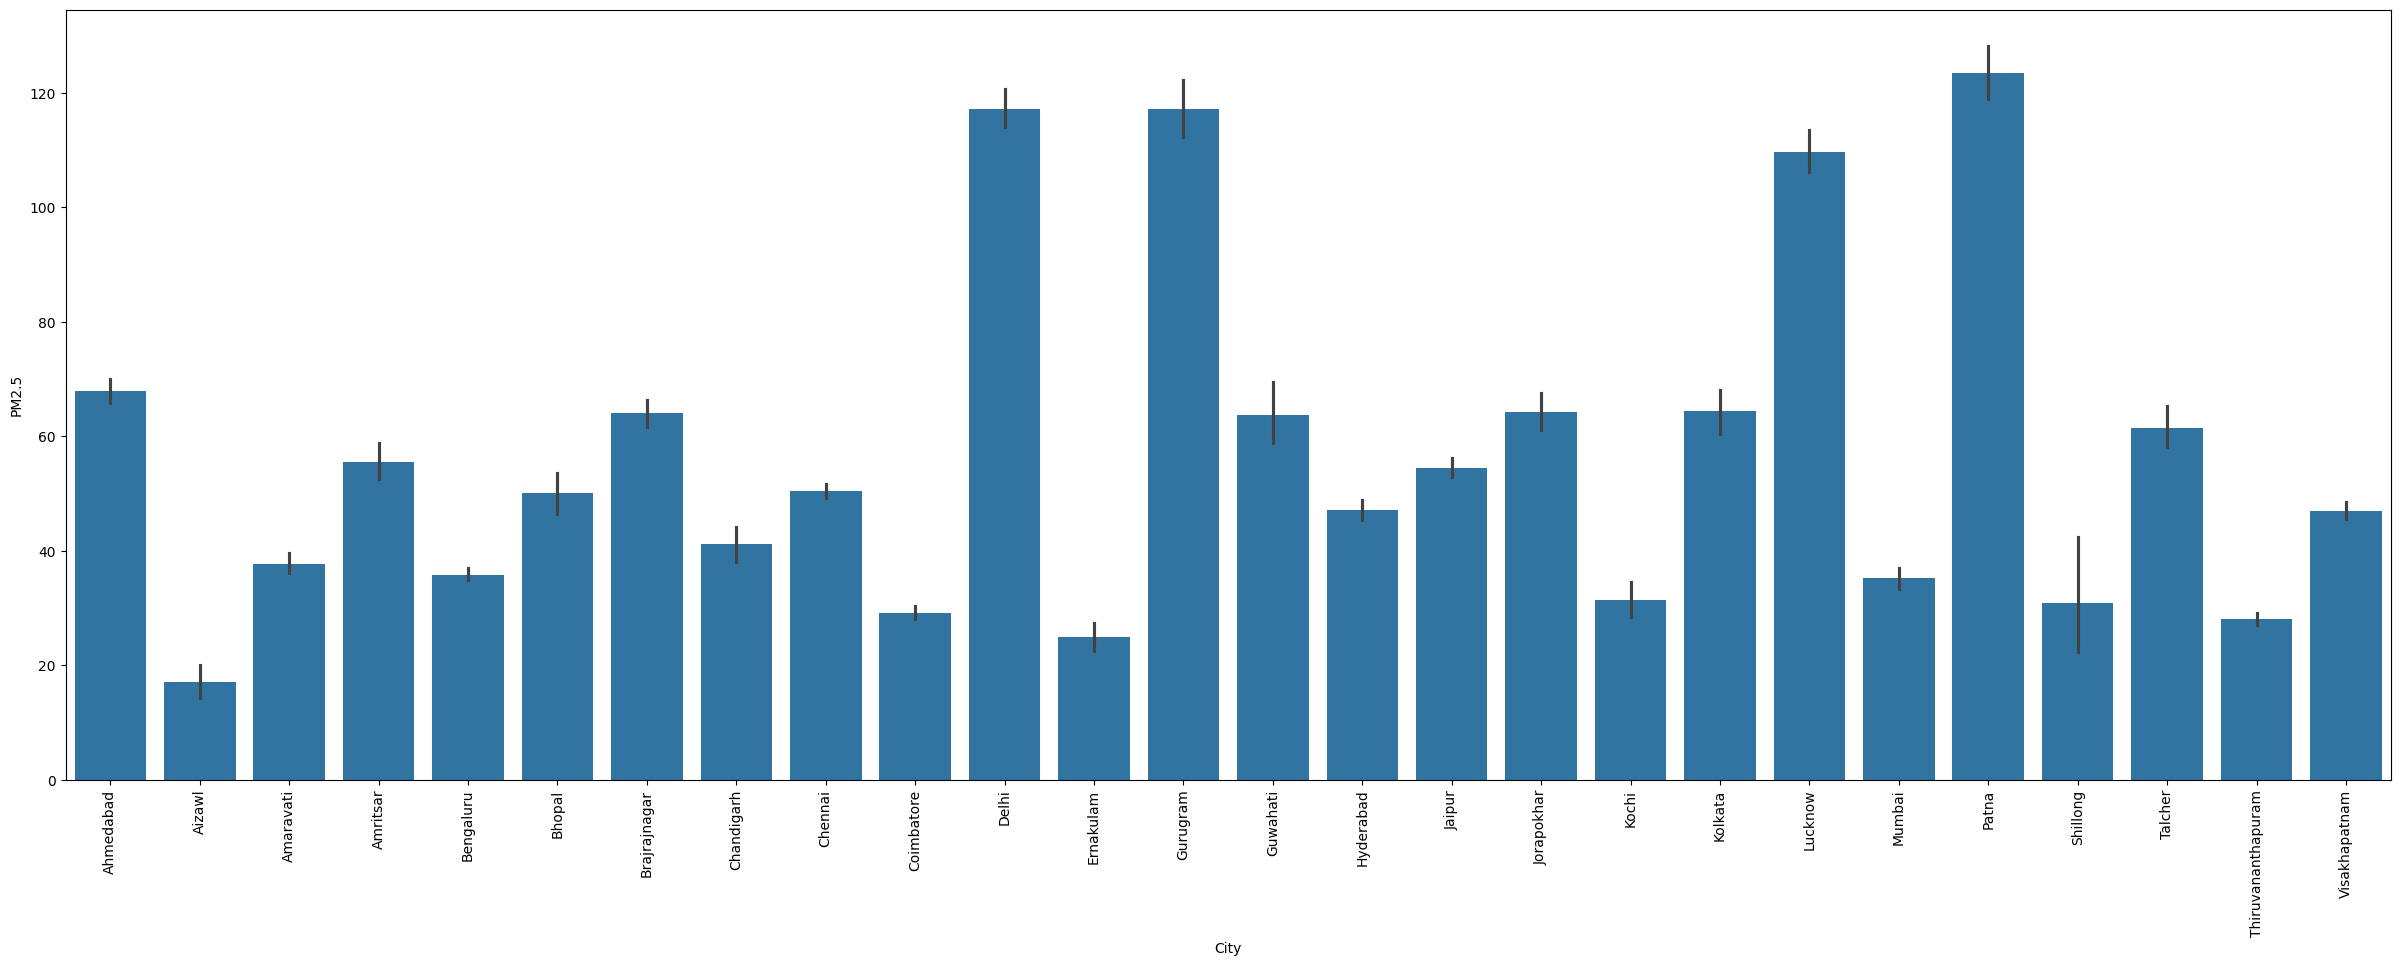

In [ ]:
#Shows the name of the state with high level of PM2.5
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='PM2.5',data=df);

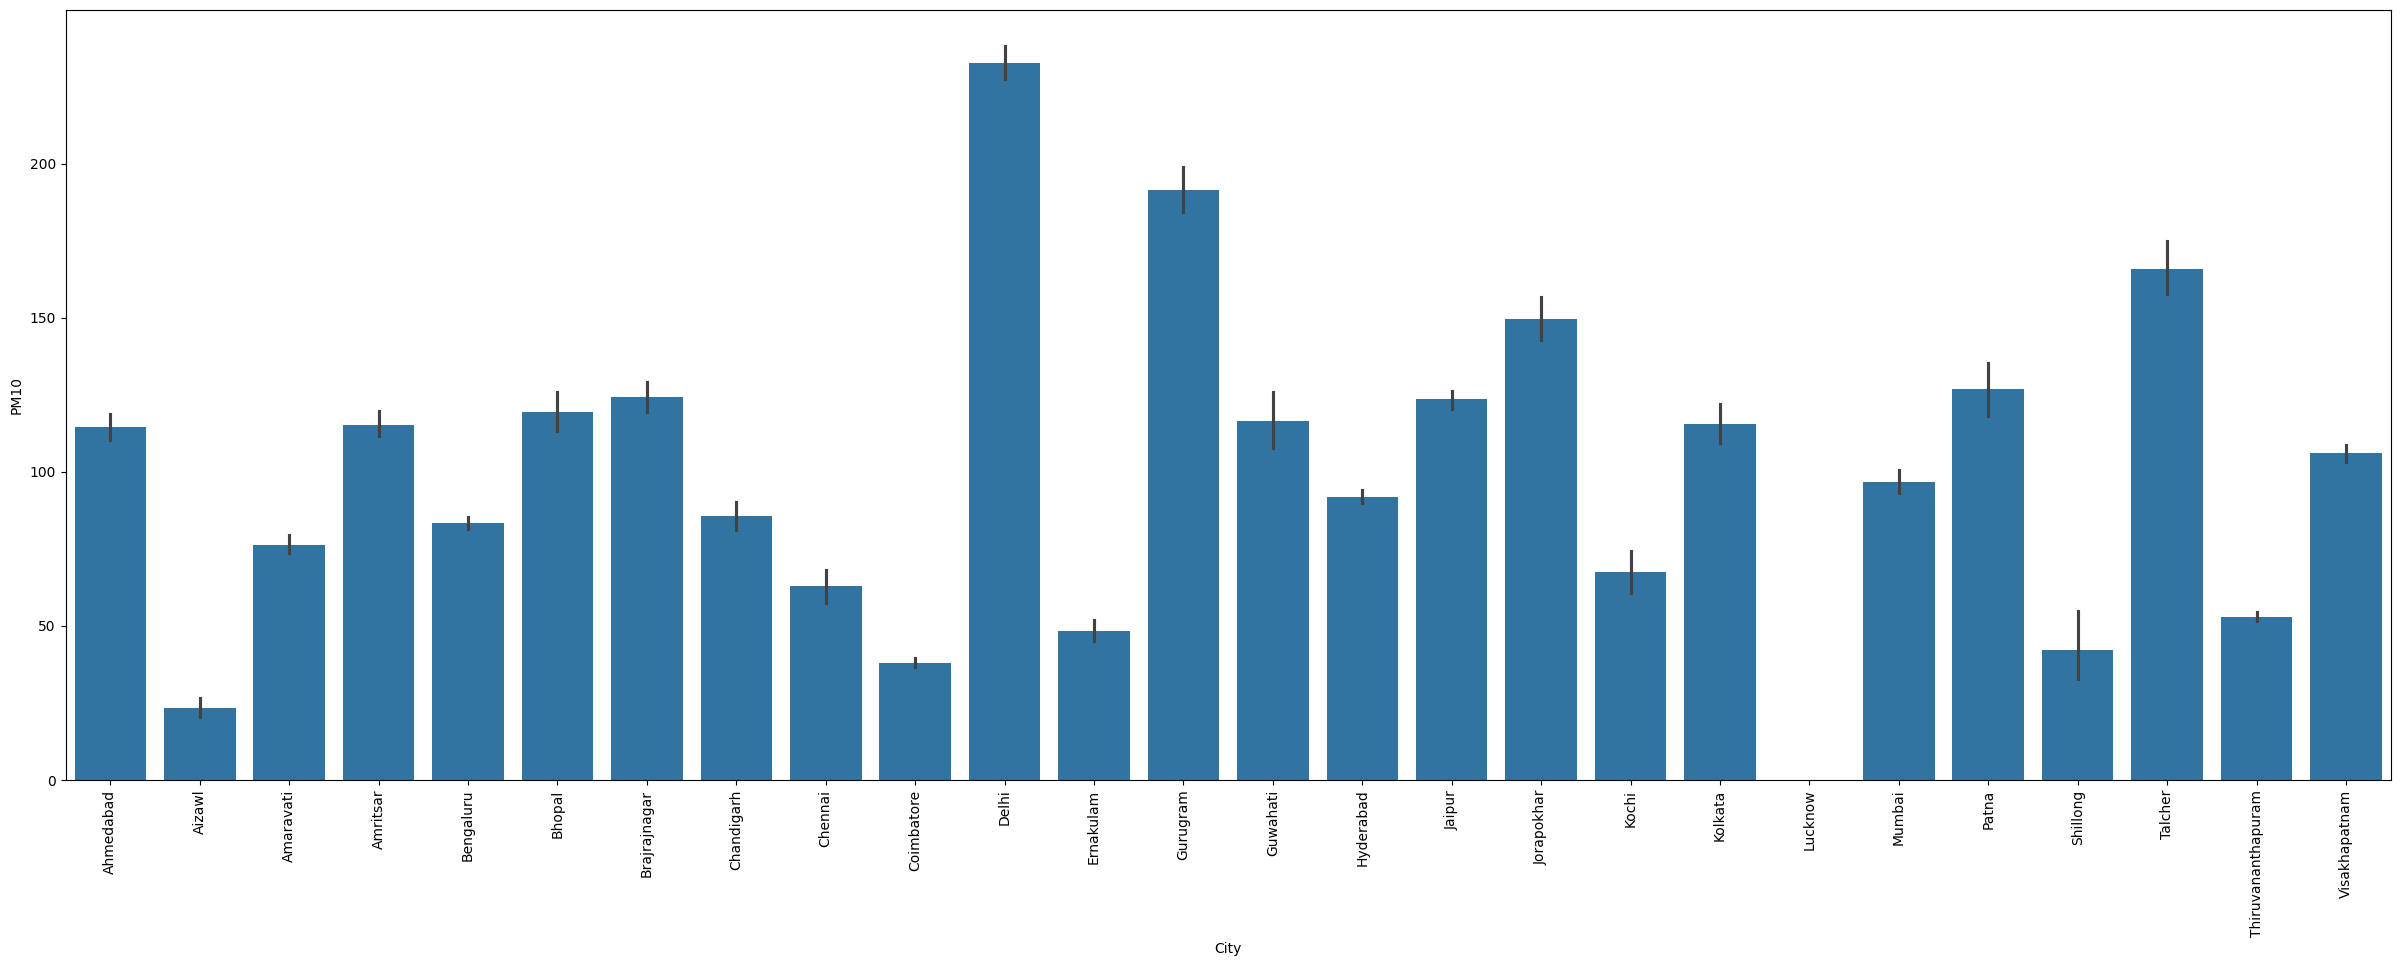

In [ ]:
#Shows the name of the state with high level of PM10
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='PM10',data=df);

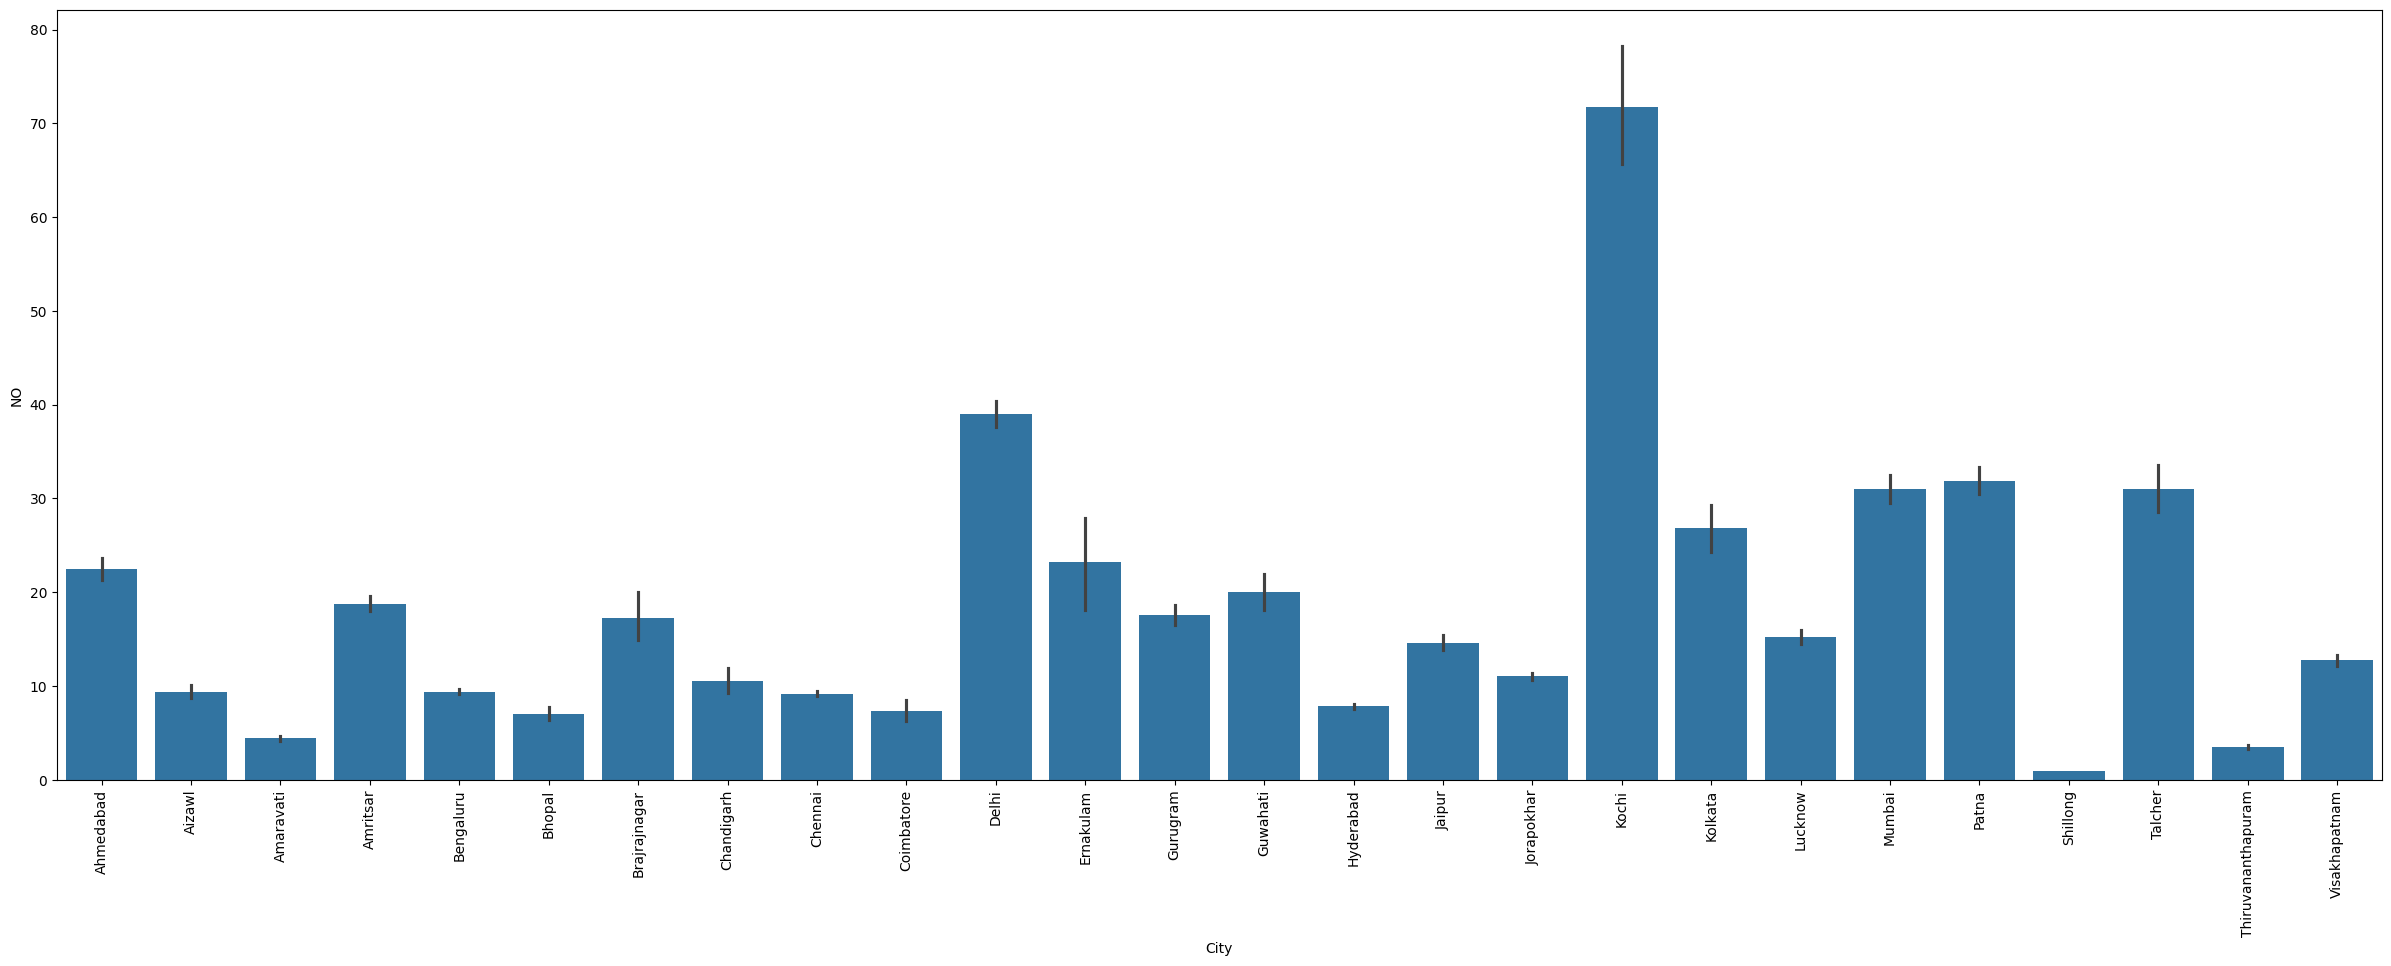

In [ ]:
#Shows the name of the state with high level of NO
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='NO',data=df);

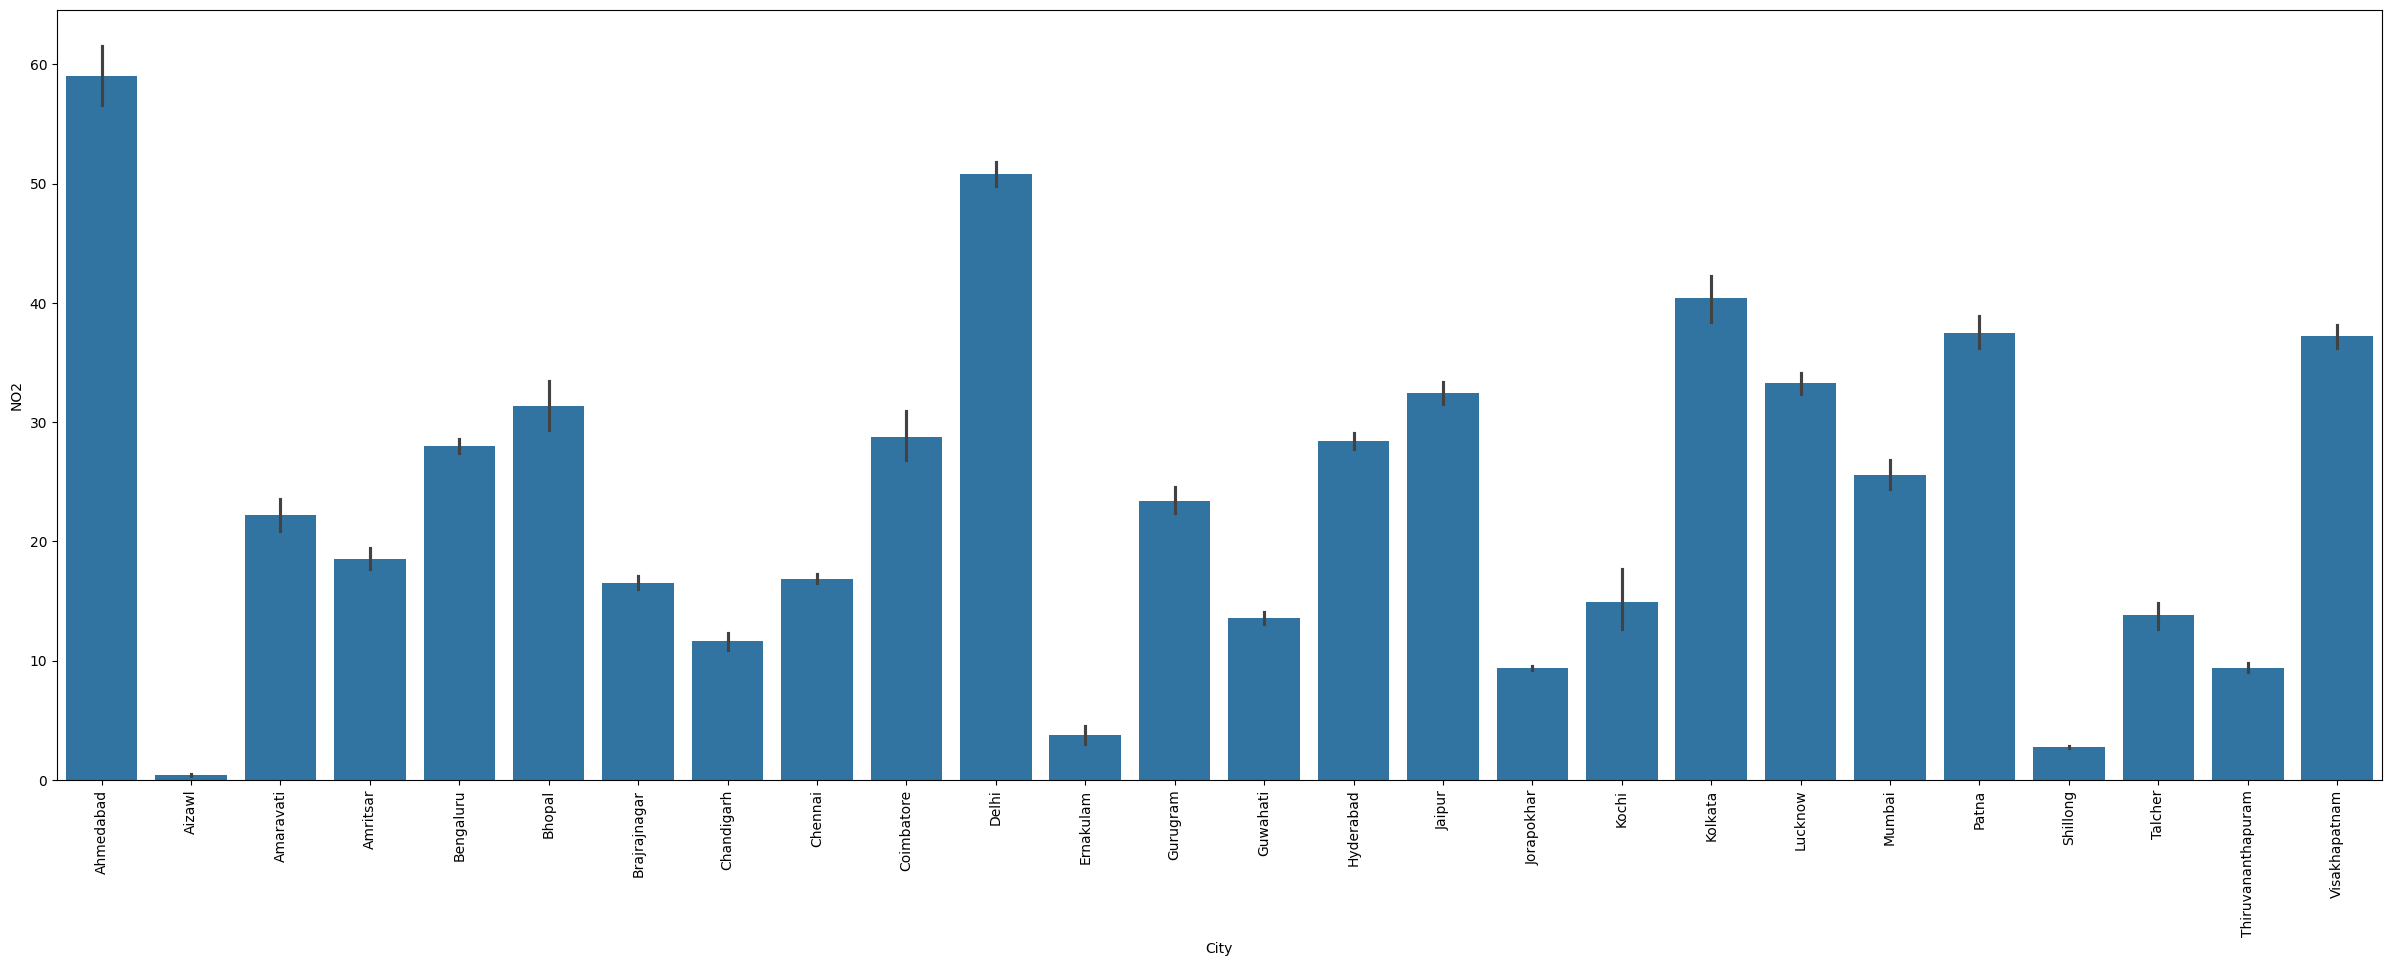

In [ ]:
#Shows the name of the state with high level of NO2
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='NO2',data=df);

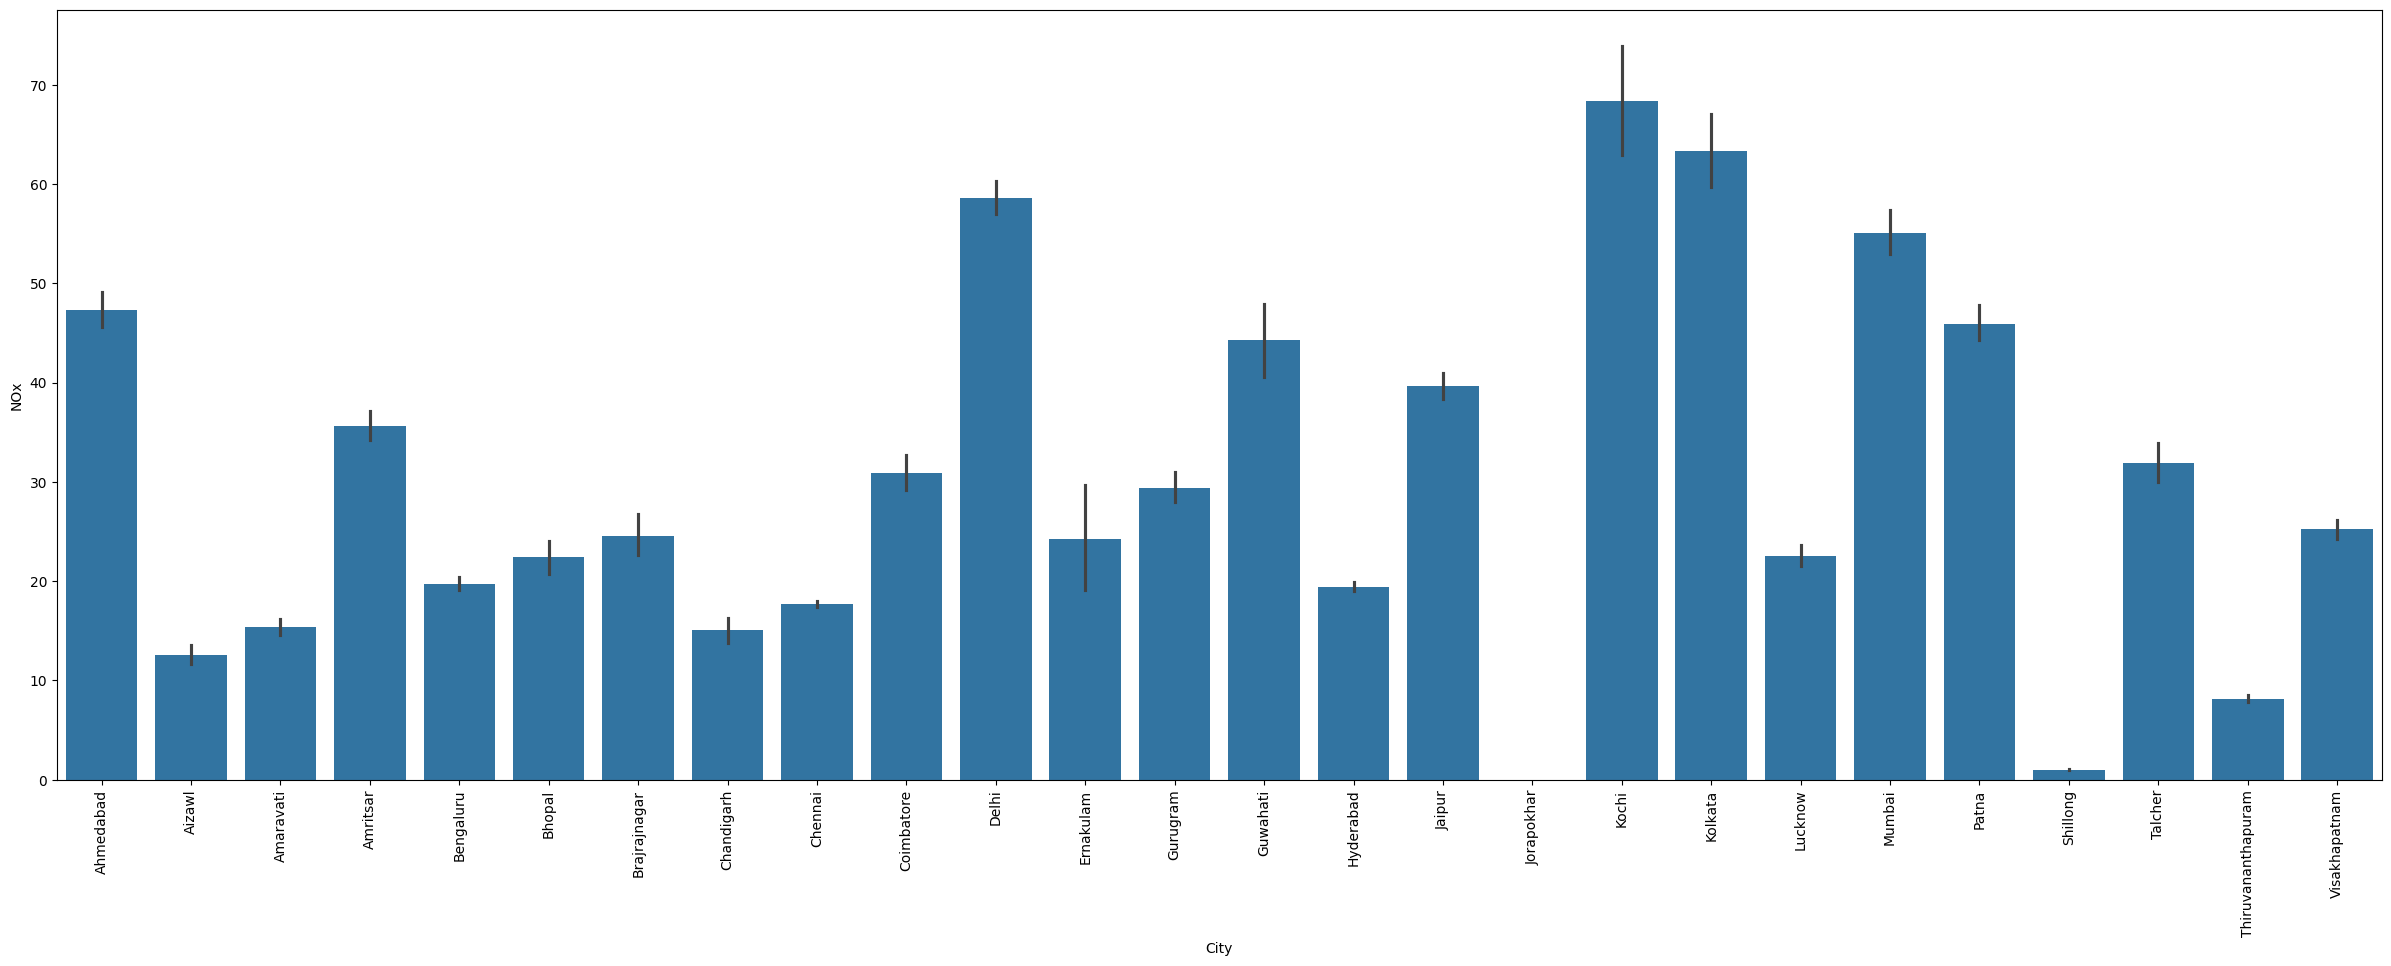

In [ ]:

#Shows the name of the state with high level of NOx
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='NOx',data=df);

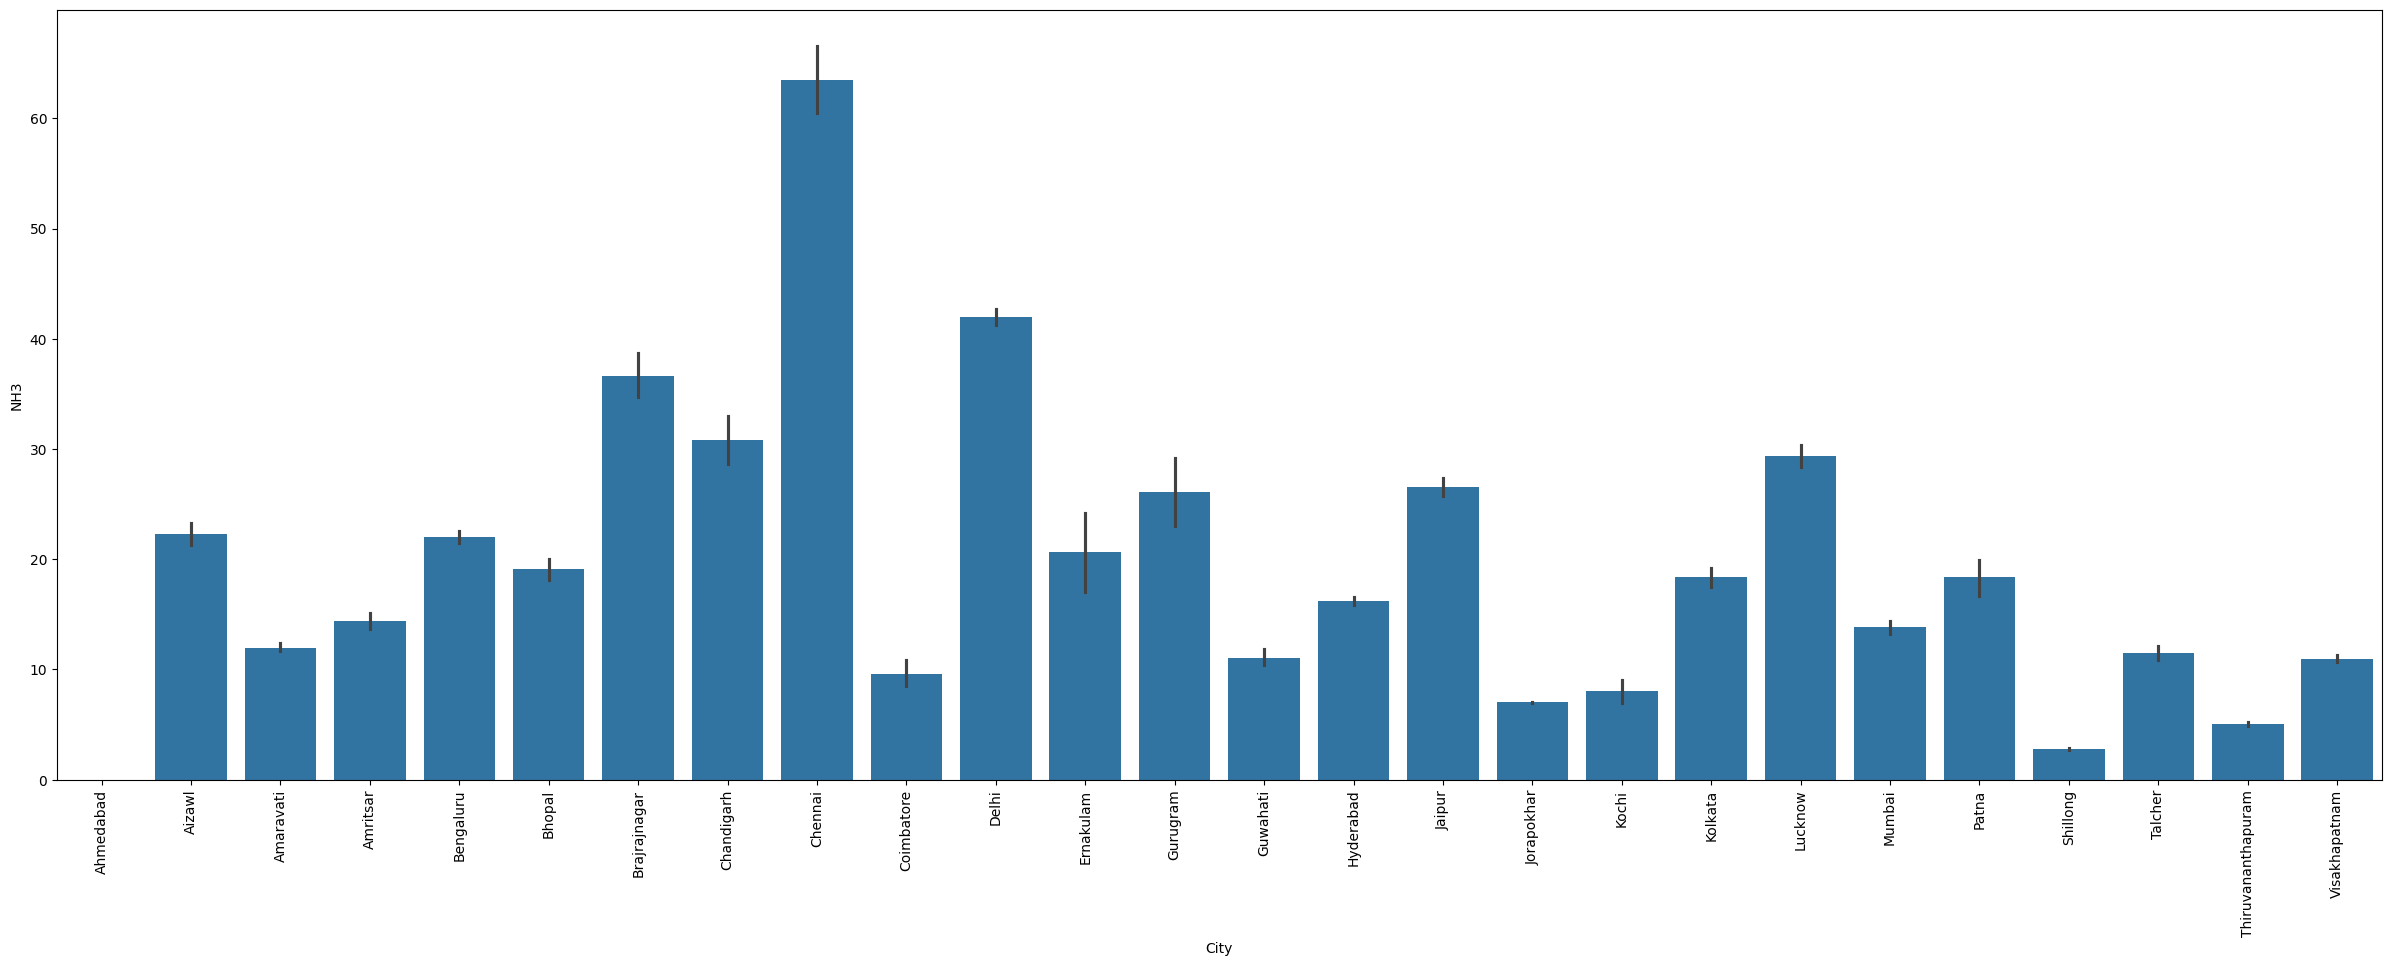

In [ ]:
#Shows the name of the state with high level of NH3
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='NH3',data=df);

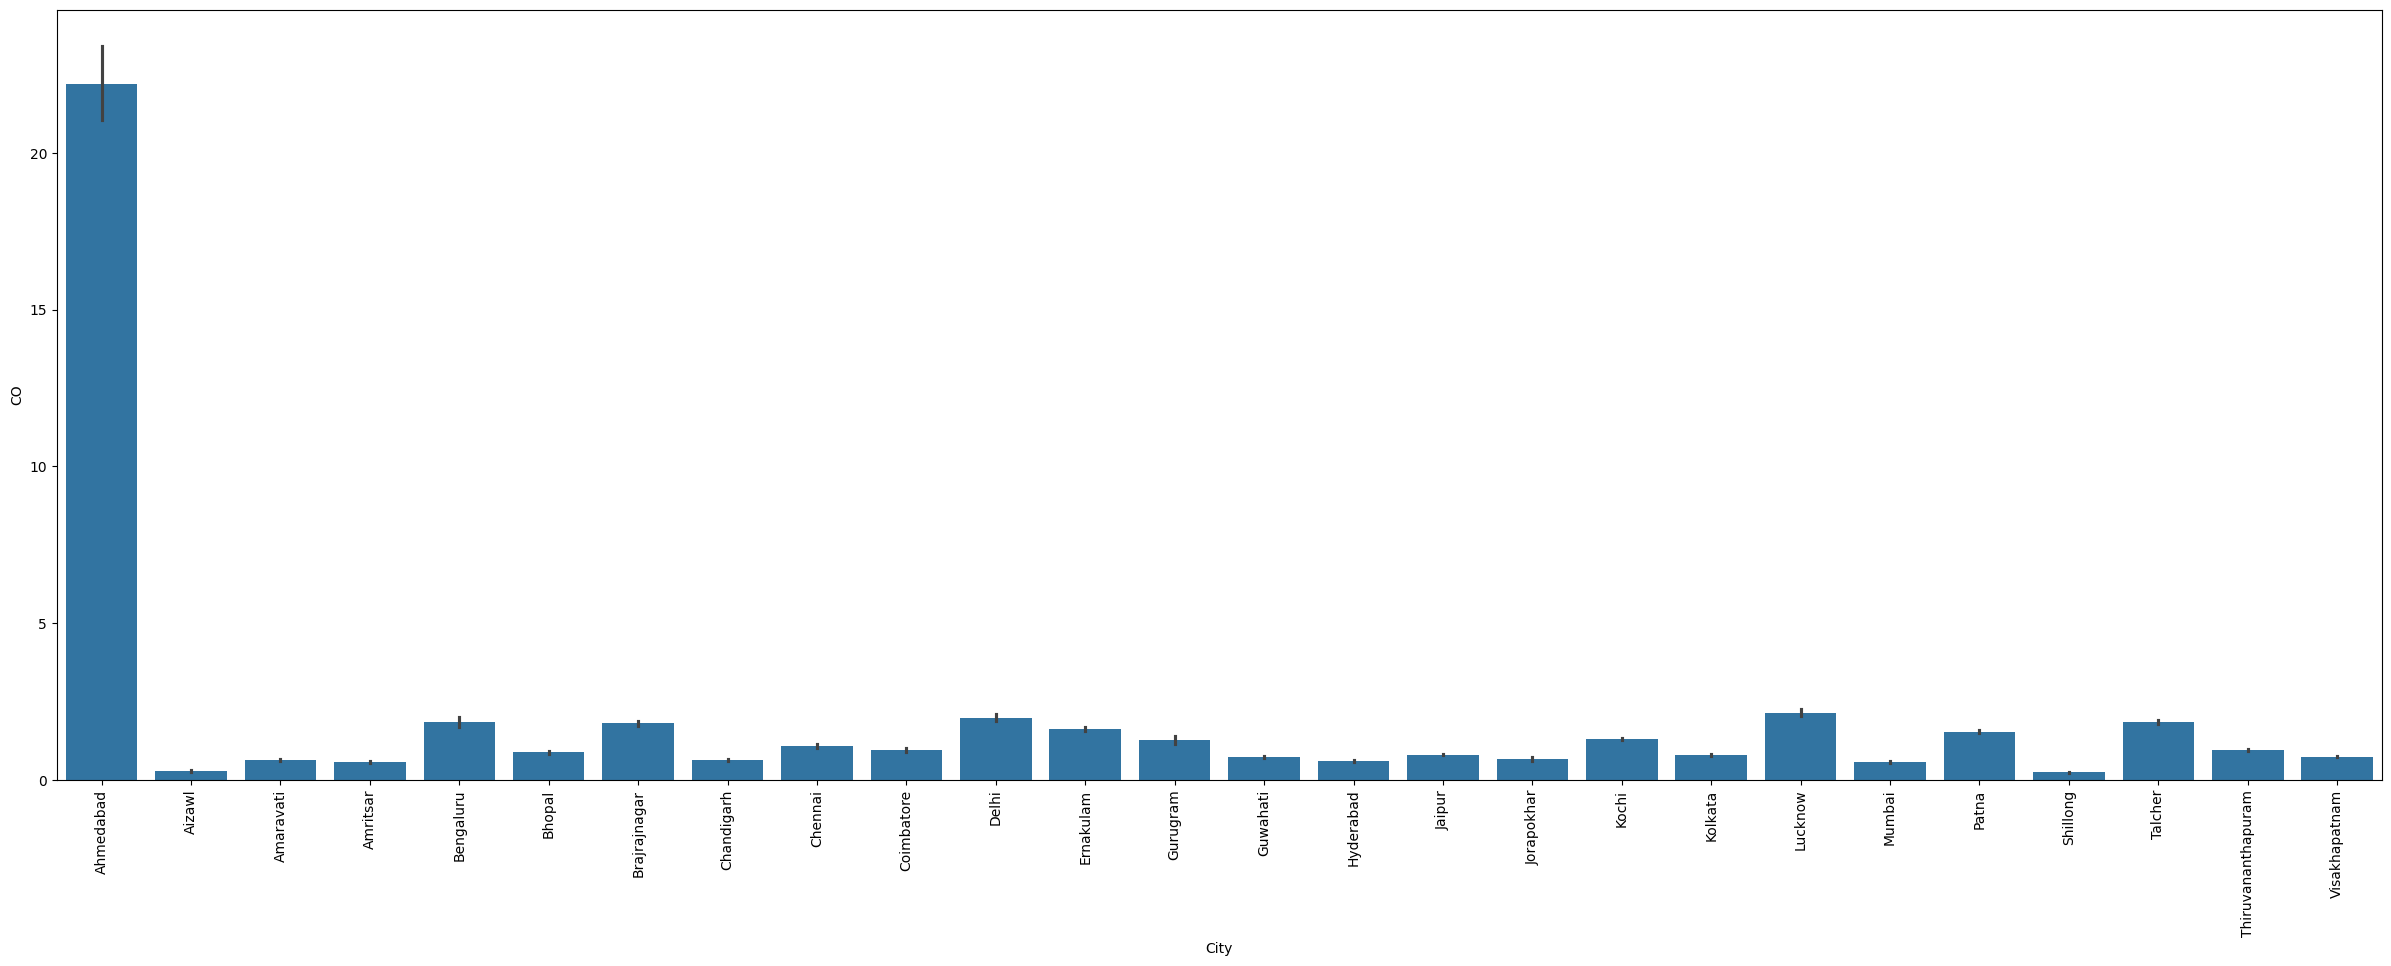

In [ ]:
#Shows the name of the state with high level of CO
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='CO',data=df);

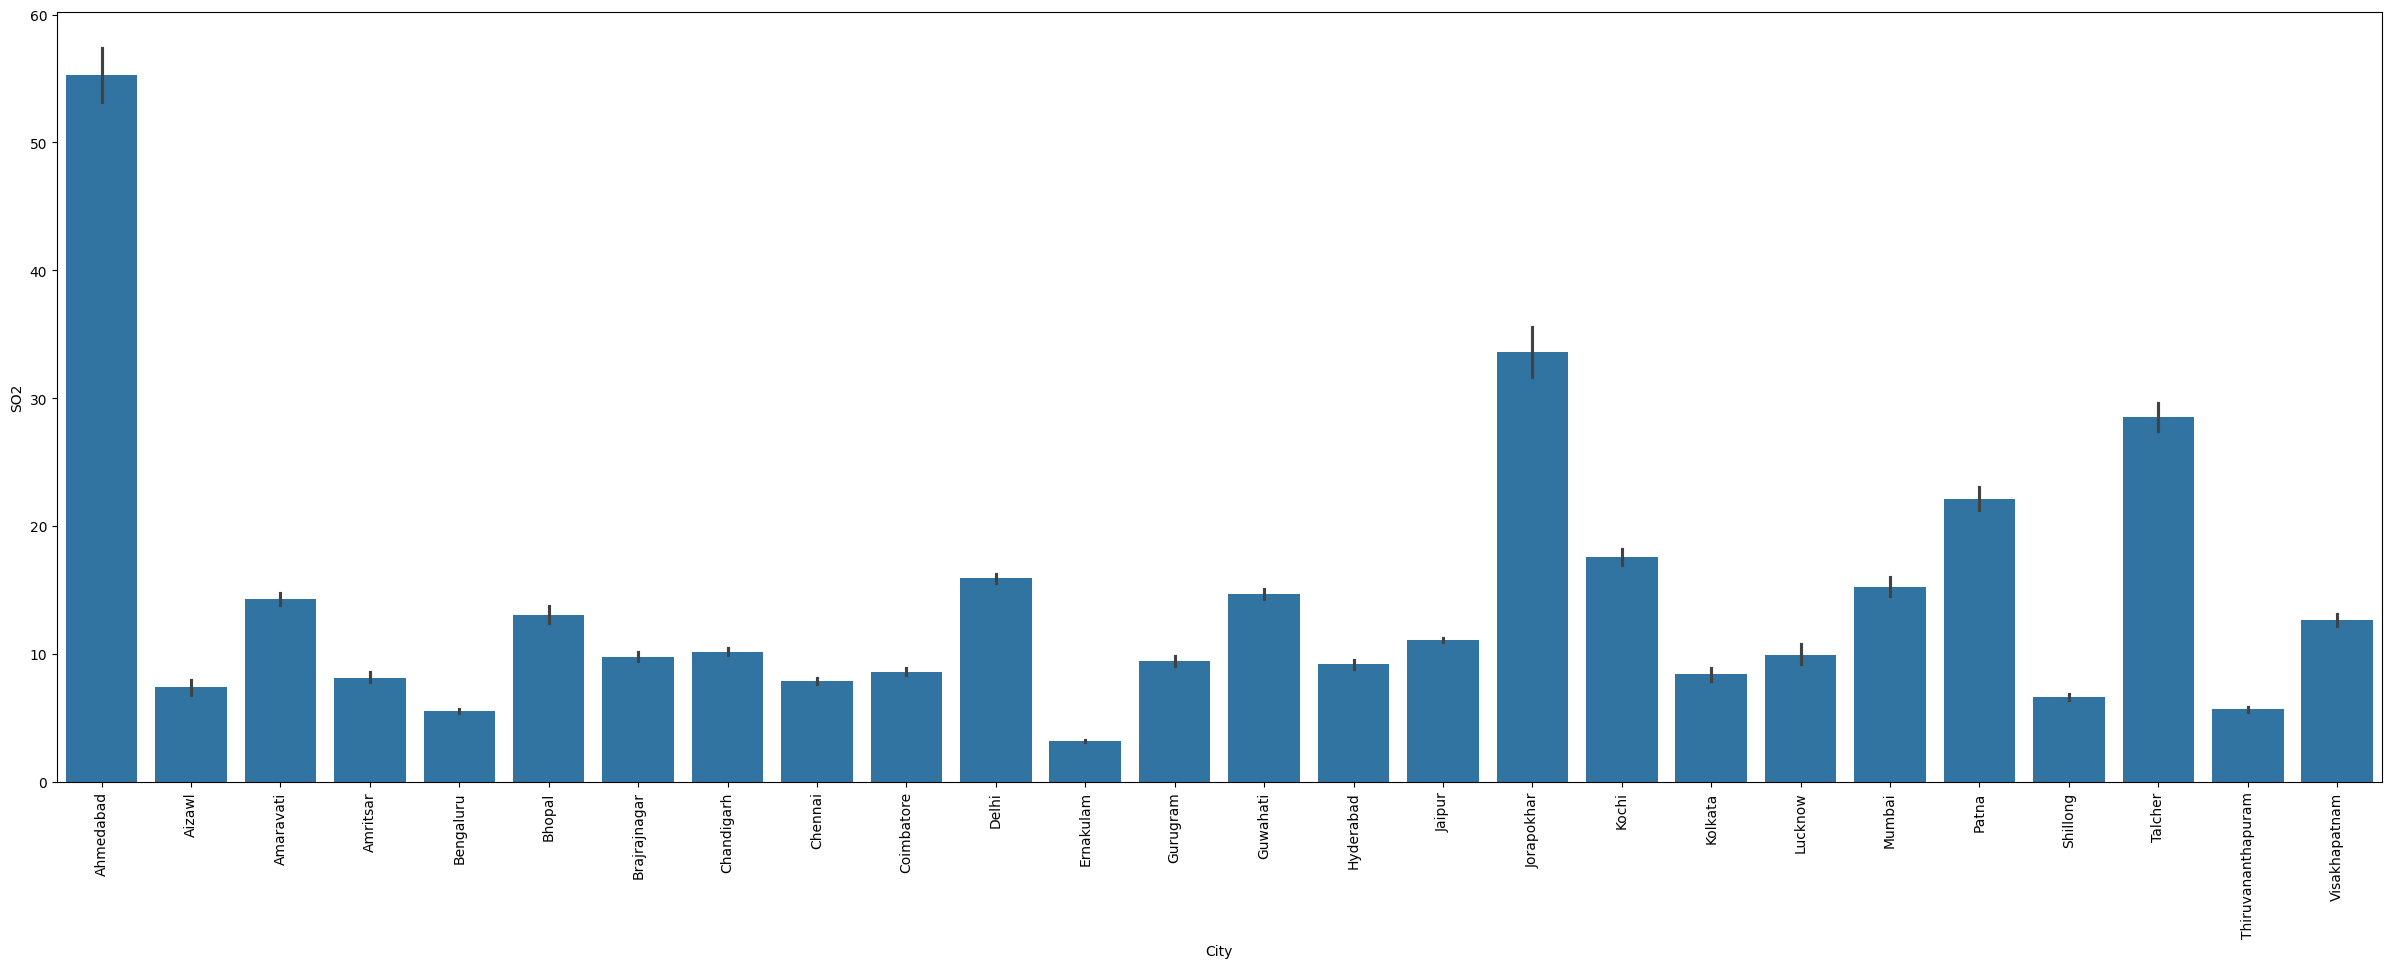

In [ ]:
#Shows the name of the state with high level of SO2
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='SO2',data=df);

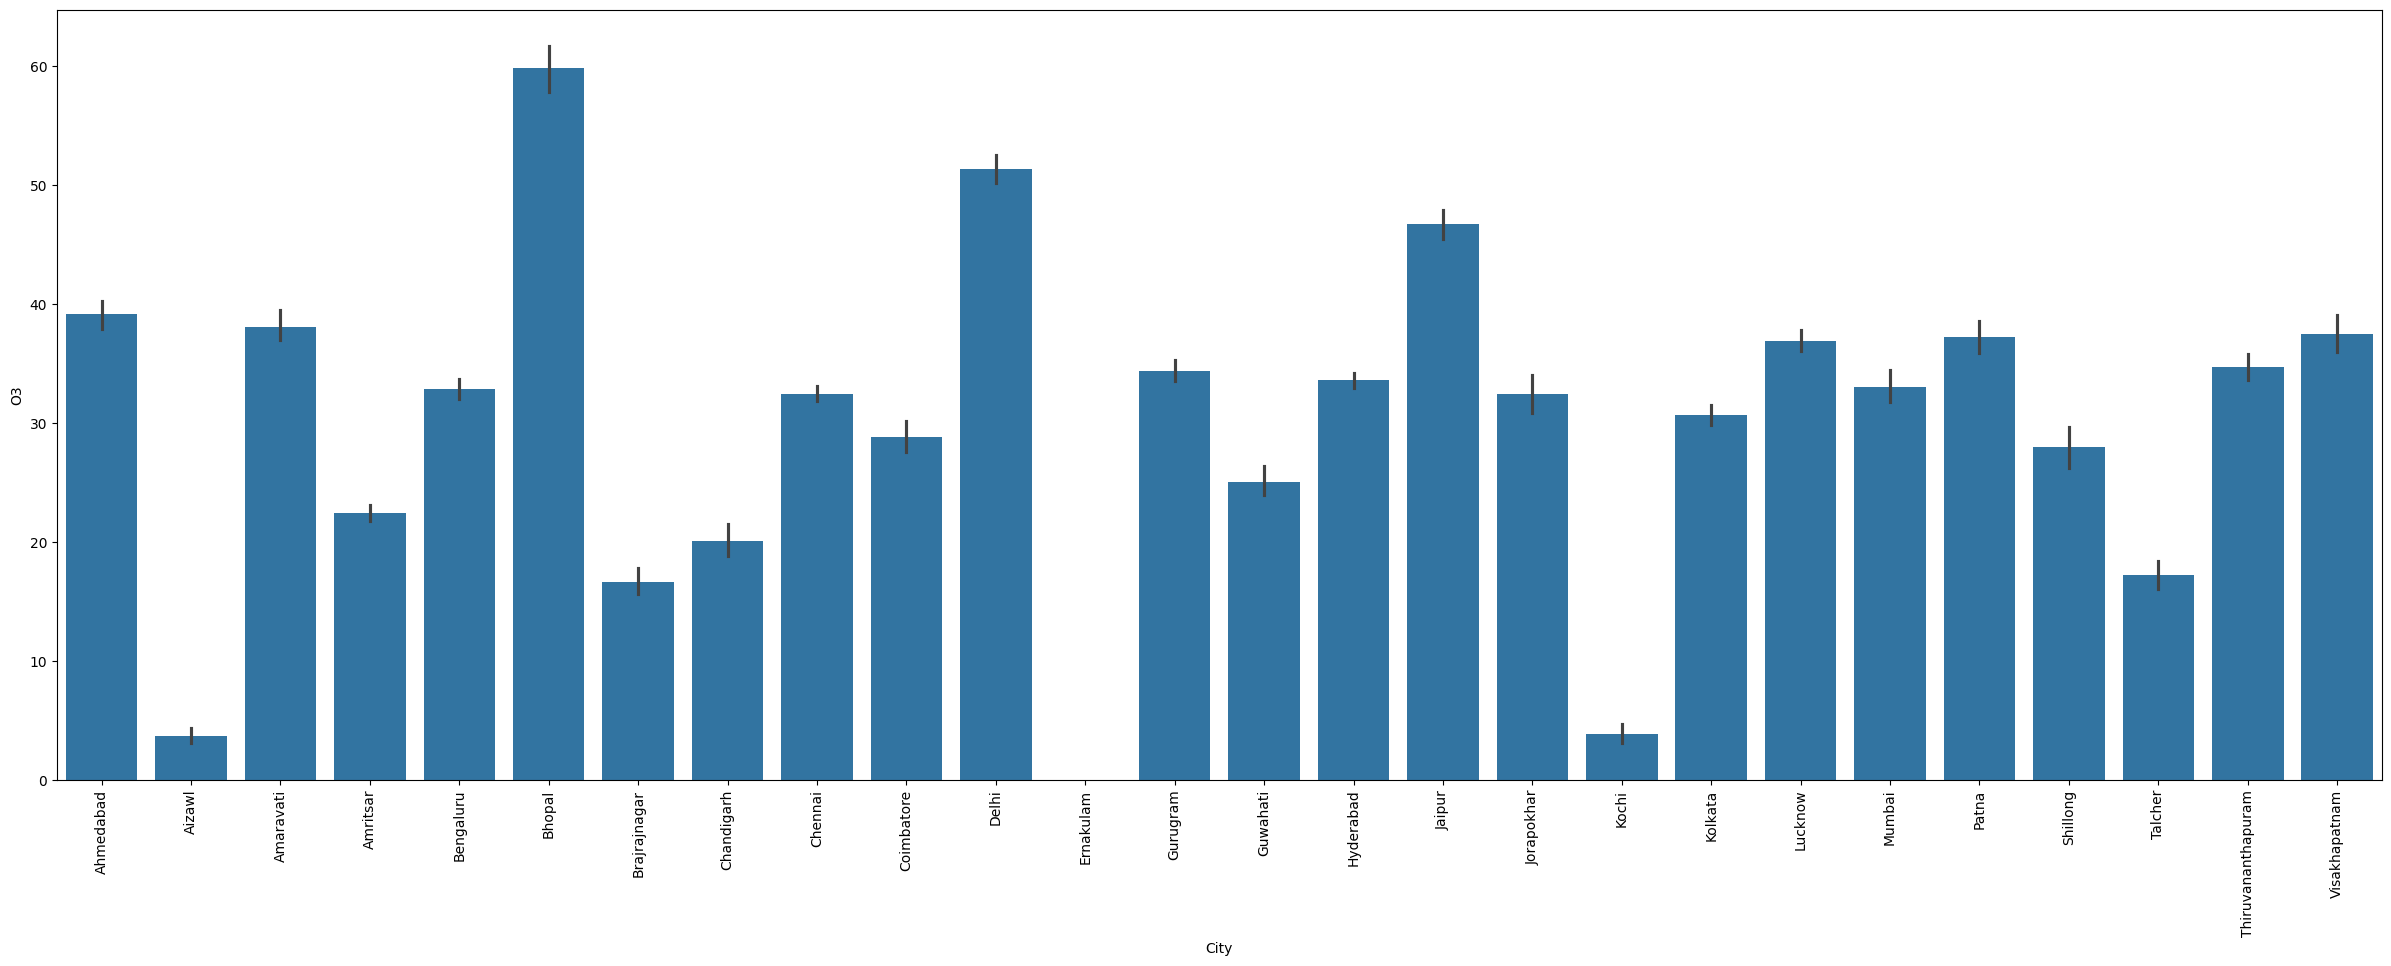

In [ ]:
#Shows the name of the state with high level of O3
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='O3',data=df);

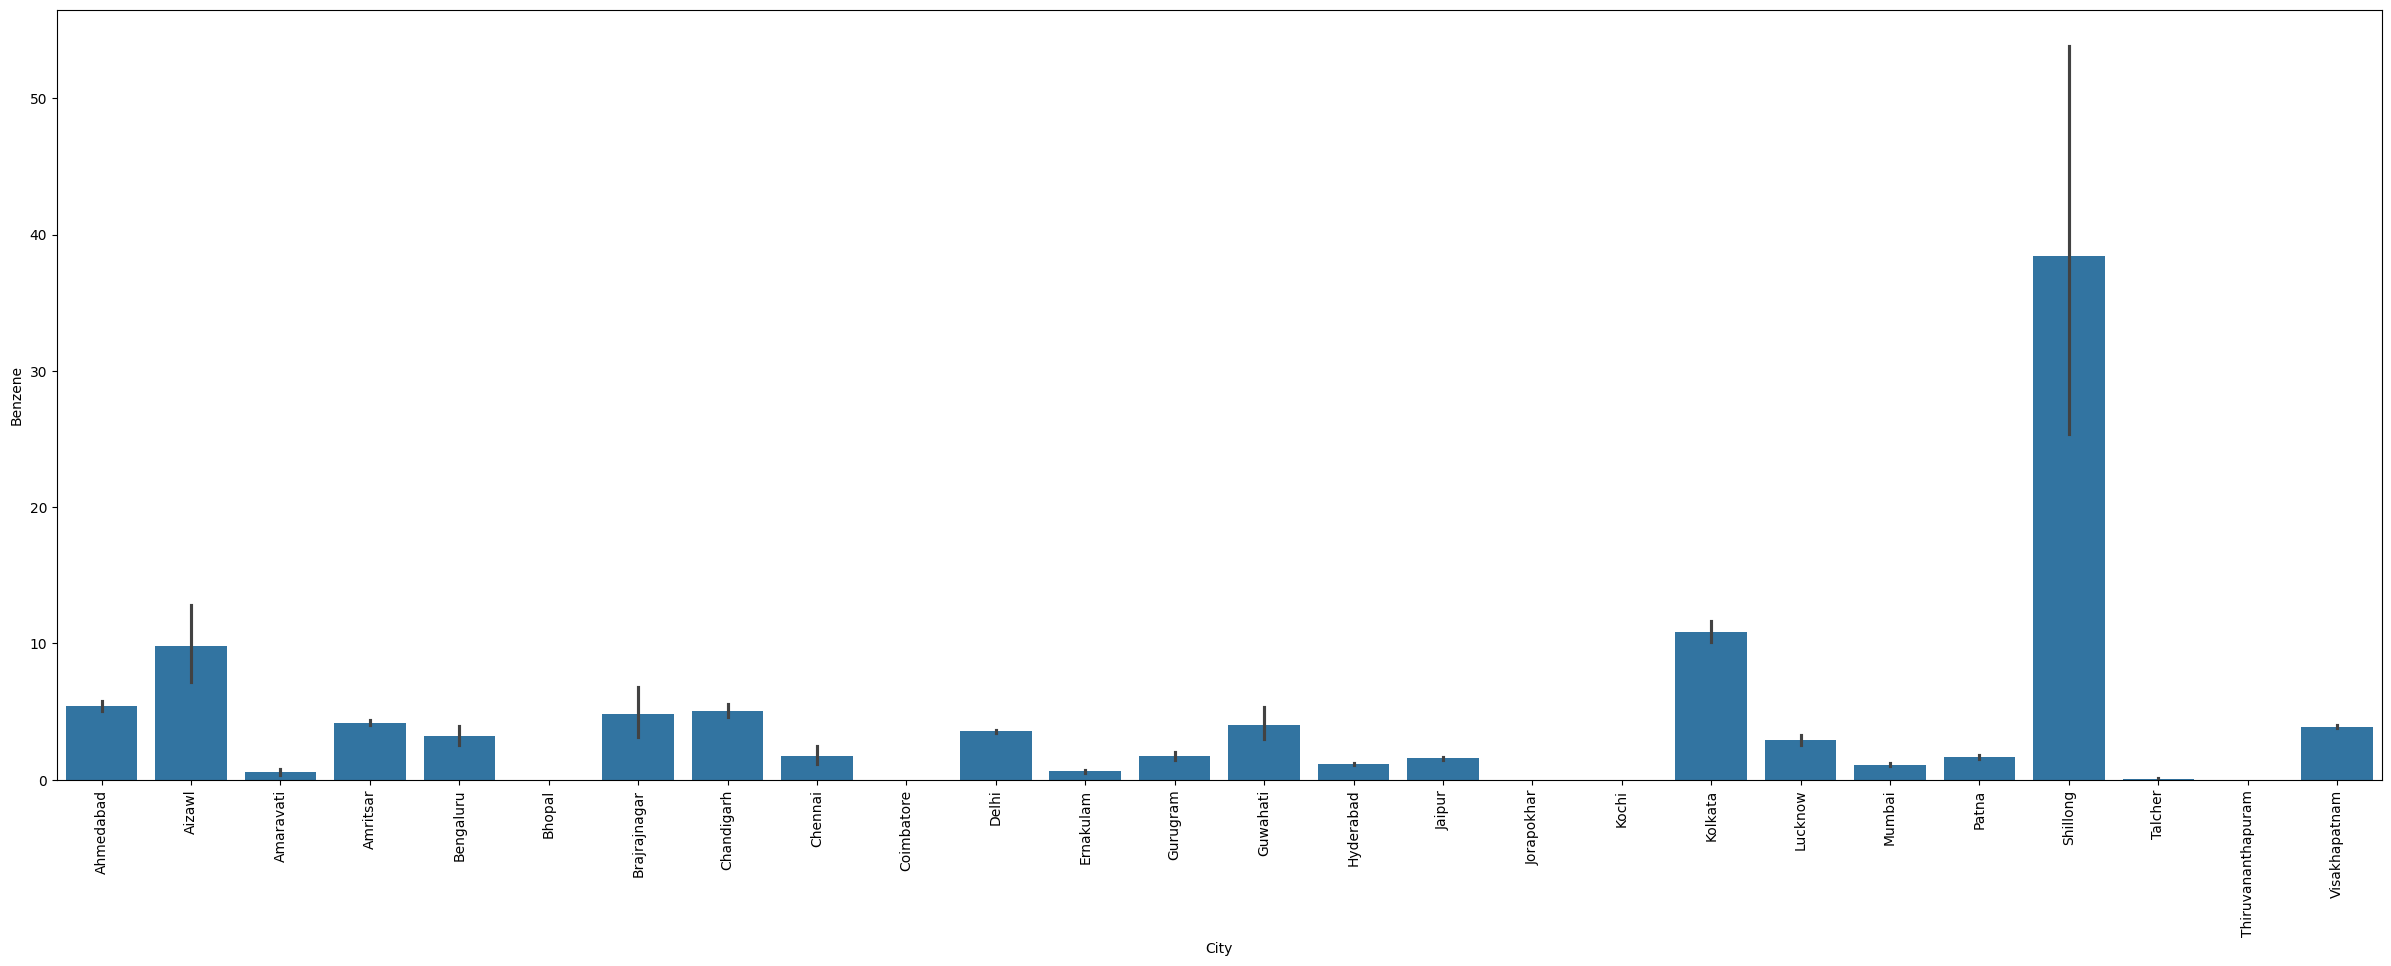

In [ ]:
#Shows the name of the state with high level of Benzene
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='Benzene',data=df);

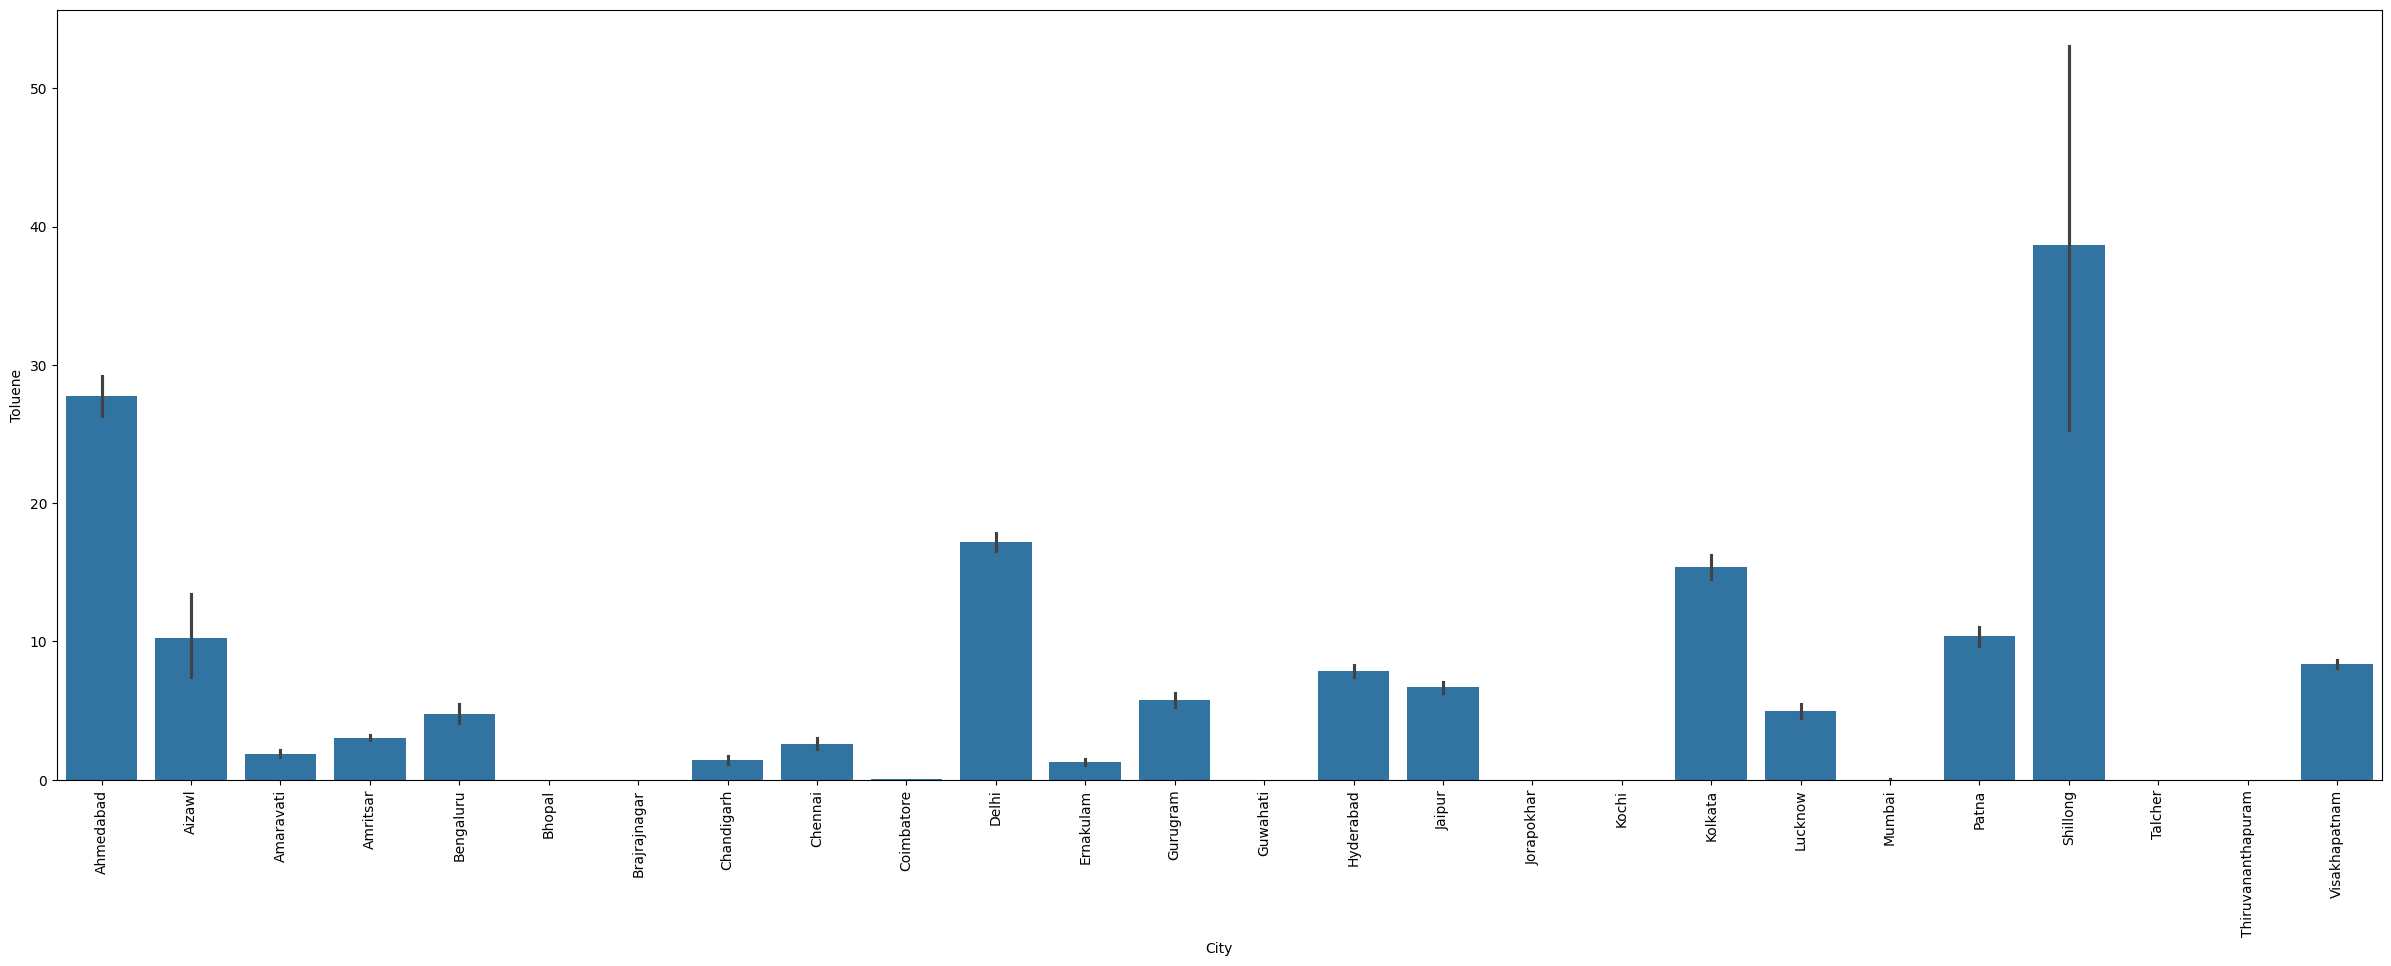

In [ ]:

#Shows the name of the state with high level of Toluene
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='Toluene',data=df);

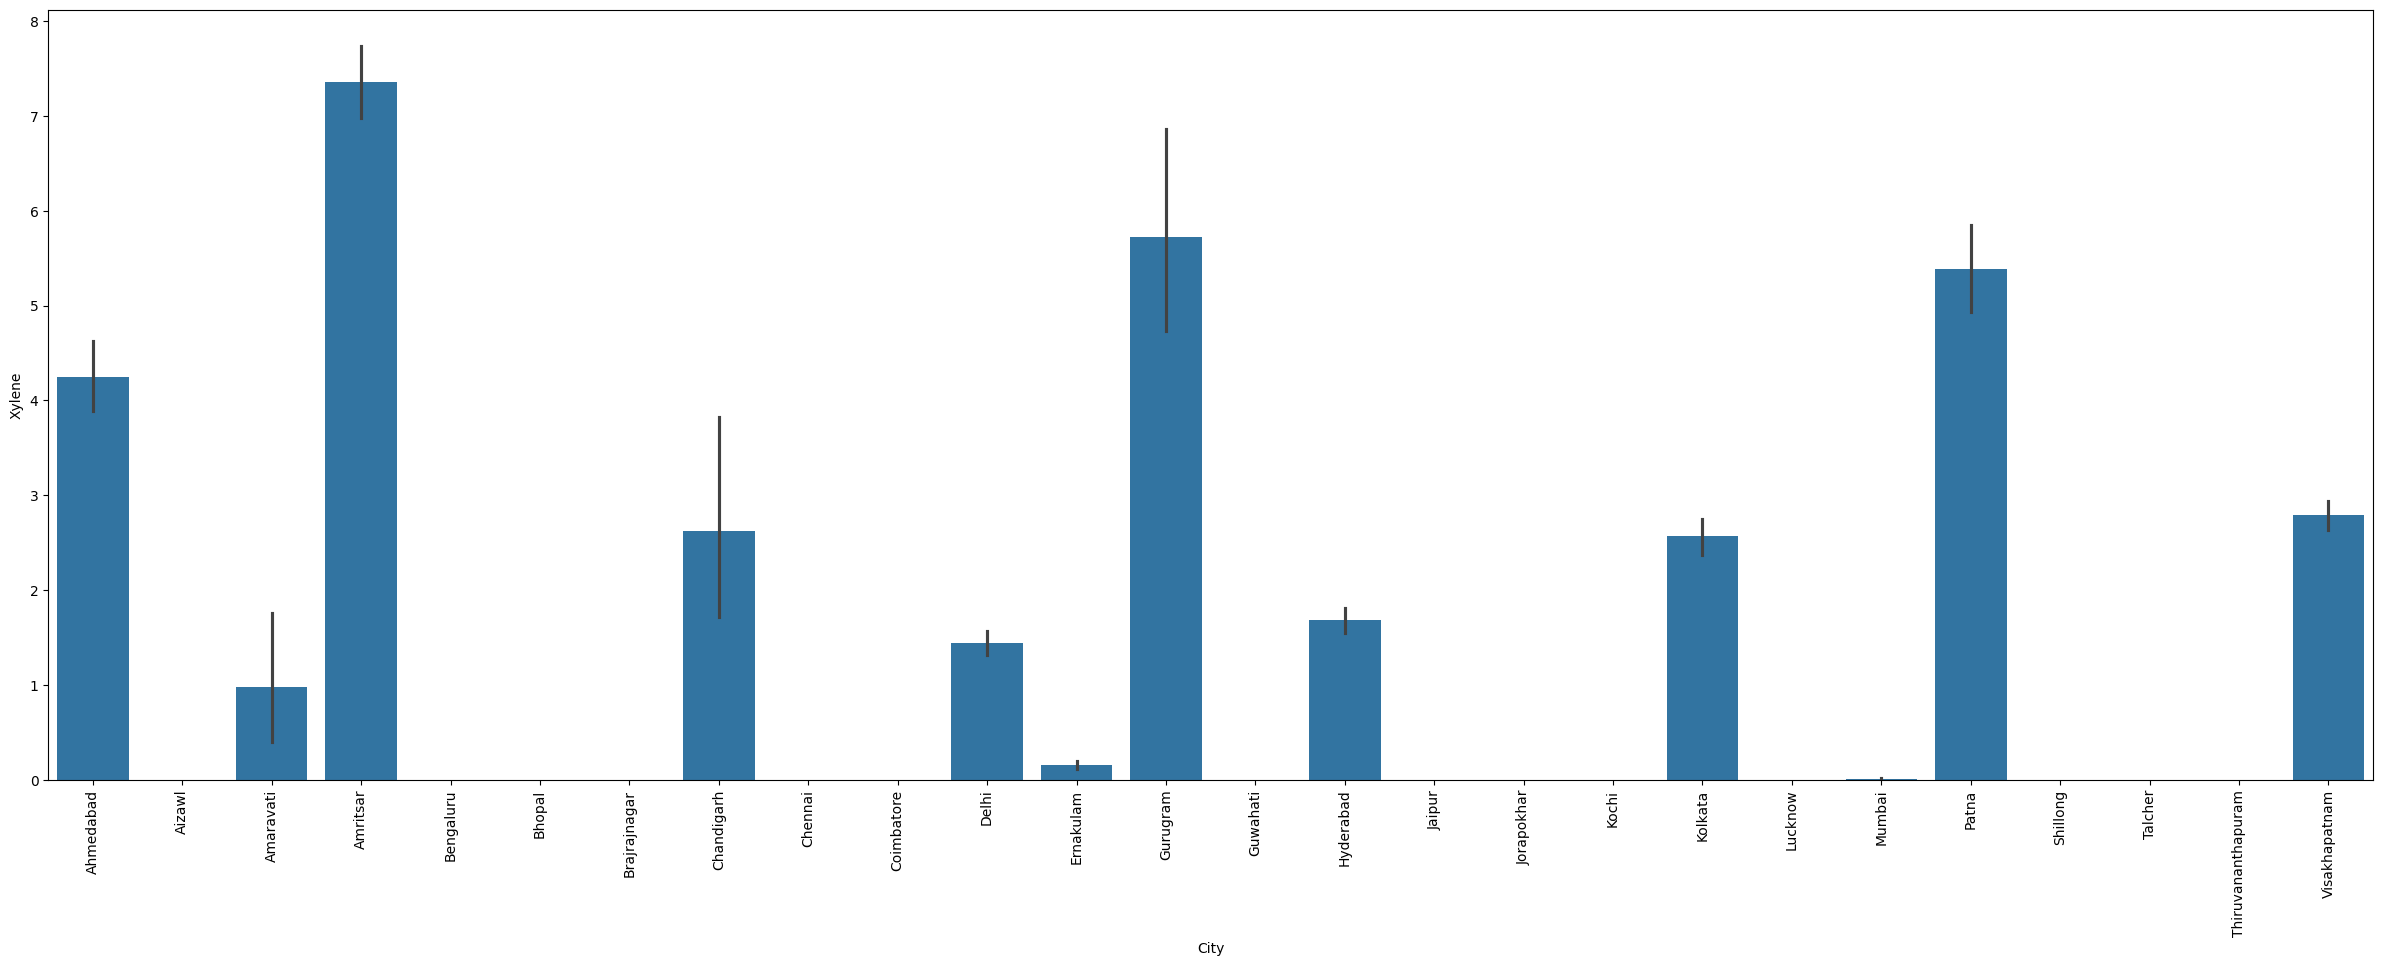

In [ ]:

#Shows the name of the state with high level of Xylene
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='Xylene',data=df);

Checking null values ond treating those null values

In [ ]:
#Checking all null values
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

,0
Xylene,18109
PM10,11140
NH3,10328
Toluene,8041
Benzene,5623
AQI,4681
AQI_Bucket,4681
PM2.5,4598
NOx,4185
O3,4022


In [ ]:
#count returns the non nan values
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

,0
Xylene,61.322001
PM10,37.723071
NH3,34.973418
Toluene,27.229014
Benzene,19.041008
AQI,15.851139
AQI_Bucket,15.851139
PM2.5,15.570079
NOx,14.171549
O3,13.619586


In [ ]:

#to compare the total missing values and the percentage of the missing vale to decide whether to keep or drop the column
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percentage'])
missing_data_with_percentage

,Total,Percentage
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [ ]:
#dropping column date as it is of no use
df.drop(['Date'],axis=1, inplace= True)

In [ ]:
#checking the null values
df.isnull().sum()

,0
City,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854
O3,4022


In [ ]:

df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
#Null value imputation for categorical data
df['AQI_Bucket']= df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

In [ ]:
#Null numeric data replaced with zero
df.fillna(0,inplace=True)

In [ ]:
#Checking null values after imputation
df.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,0.00,0.00,0.92,18.22,17.15,0.00,0.92,27.64,133.36,0.00,0.02,0.00,0.0,Moderate
1,Ahmedabad,0.00,0.00,0.97,15.69,16.46,0.00,0.97,24.55,34.06,3.68,5.50,3.77,0.0,Moderate
2,Ahmedabad,0.00,0.00,17.40,19.30,29.70,0.00,17.40,29.07,30.70,6.80,16.40,2.25,0.0,Moderate
3,Ahmedabad,0.00,0.00,1.70,18.48,17.97,0.00,1.70,18.59,36.08,4.43,10.14,1.00,0.0,Moderate
4,Ahmedabad,0.00,0.00,22.10,21.42,37.76,0.00,22.10,39.33,39.31,7.01,18.89,2.78,0.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


Calculate the air quality index PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene

Formula to Calculate Pm2.5 pollutant Index


In [ ]:
def cal_PM25I(pm25):
    pm25i = 0
    if pm25 <= 30:
        pm25i = pm25 * (50 / 30)
    elif pm25 > 30 and pm25 <= 60:
        pm25i = 50 + (pm25 - 30) * (50 / 30)
    elif pm25 > 60 and pm25 <= 90:
        pm25i = 100 + (pm25 - 60) * (100 / 30)
    elif pm25 > 90 and pm25 <= 120:
        pm25i = 200 + (pm25 - 90) * (100 / 30)
    elif pm25 > 120 and pm25 <= 250:
        pm25i = 300 + (pm25 - 120) * (100 / 130)
    elif pm25 > 250:
        pm25i = 400 + (pm25 - 250) * (100 / 250)
    return pm25i

# Apply function assuming your DataFrame column is named "PM2.5"
df['PM25I'] = df['PM2.5'].apply(cal_PM25I)
data = df[['PM2.5', 'PM25I']]
print(data.head())
#Because of the null values the resultant is zero


   PM2.5  PM25I
0    0.0    0.0
1    0.0    0.0
2    0.0    0.0
3    0.0    0.0
4    0.0    0.0


Formula to Calculate Pm10 pollutant Index

In [ ]:
def cal_PM10I(pm10):
    pm10i = 0
    if pm10 <= 50:
        pm10i = pm10 * (50 / 50)
    elif pm10 > 50 and pm10 <= 100:
        pm10i = 50 + (pm10 - 50) * (50 / 50)
    elif pm10 > 100 and pm10 <= 250:
        pm10i = 100 + (pm10 - 100) * (100 / 150)
    elif pm10 > 250 and pm10 <= 350:
        pm10i = 200 + (pm10 - 250) * (100 / 100)
    elif pm10 > 350 and pm10 <= 430:
        pm10i = 300 + (pm10 - 350) * (100 / 80)
    elif pm10 > 430:
        pm10i = 400 + (pm10 - 430) * (100 / 170)
    return pm10i

# Apply function assuming your DataFrame column is named "PM10"
df['PM10I'] = df['PM10'].apply(cal_PM10I)
data = df[['PM10', 'PM10I']]
print(data.head())
#Because of the null values the resultant is zero


   PM10  PM10I
0   0.0    0.0
1   0.0    0.0
2   0.0    0.0
3   0.0    0.0
4   0.0    0.0


Formula to Calculate NO pollutant Index

In [ ]:
def cal_NOI(no):
    # Hypothetical breakpoints (μg/m³, NOT official)
    noi = 0
    if no <= 40:
        noi = no * (50 / 40)
    elif no > 40 and no <= 80:
        noi = 50 + (no - 40) * (50 / 40)
    elif no > 80 and no <= 180:
        noi = 100 + (no - 80) * (100 / 100)
    elif no > 180 and no <= 280:
        noi = 200 + (no - 180) * (100 / 100)
    elif no > 280 and no <= 400:
        noi = 300 + (no - 280) * (100 / 120)
    elif no > 400:
        noi = 400 + (no - 400) * (100 / 120)
    return noi

# Apply function assuming your DataFrame column is named "NO"
df['NOI'] = df['NO'].apply(cal_NOI)
data = df[['NO', 'NOI']]
print(data.head())


      NO      NOI
0   0.92   1.1500
1   0.97   1.2125
2  17.40  21.7500
3   1.70   2.1250
4  22.10  27.6250


Formula to Calculate NO2 pollutant Index

In [ ]:
def cal_NO2I(no2):
    no2i = 0
    if no2 <= 40:
        no2i = no2 * (50 / 40)
    elif no2 > 40 and no2 <= 80:
        no2i = 50 + (no2 - 40) * (50 / 40)
    elif no2 > 80 and no2 <= 180:
        no2i = 100 + (no2 - 80) * (100 / 100)
    elif no2 > 180 and no2 <= 280:
        no2i = 200 + (no2 - 180) * (100 / 100)
    elif no2 > 280 and no2 <= 400:
        no2i = 300 + (no2 - 280) * (100 / 120)
    elif no2 > 400:
        no2i = 400 + (no2 - 400) * (100 / 120)
    return no2i

# Apply function assuming your DataFrame column is named "NO2"
df['NO2I'] = df['NO2'].apply(cal_NO2I)
data = df[['NO2', 'NO2I']]
print(data.head())


     NO2     NO2I
0  18.22  22.7750
1  15.69  19.6125
2  19.30  24.1250
3  18.48  23.1000
4  21.42  26.7750


Formula to Calculate NOx pollutant Index

In [ ]:
def cal_NOxI(nox):
    noxi = 0
    if nox <= 40:
        noxi = nox * (50 / 40)
    elif nox > 40 and nox <= 80:
        noxi = 50 + (nox - 40) * (50 / 40)
    elif nox > 80 and nox <= 180:
        noxi = 100 + (nox - 80) * (100 / 100)
    elif nox > 180 and nox <= 280:
        noxi = 200 + (nox - 180) * (100 / 100)
    elif nox > 280 and nox <= 400:
        noxi = 300 + (nox - 280) * (100 / 120)
    elif nox > 400:
        noxi = 400 + (nox - 400) * (100 / 120)
    return noxi

# Apply function assuming your DataFrame column is named "NOx"
df['NOxI'] = df['NOx'].apply(cal_NOxI)
data = df[['NOx', 'NOxI']]
print(data.head())


     NOx     NOxI
0  17.15  21.4375
1  16.46  20.5750
2  29.70  37.1250
3  17.97  22.4625
4  37.76  47.2000


function to calculate the NH3 individual pollutant index

In [ ]:
def cal_NH3I(nh3):
    nh3i = 0
    if nh3 <= 200:
        nh3i = nh3 * (50 / 200)
    elif nh3 > 200 and nh3 <= 400:
        nh3i = 50 + (nh3 - 200) * (50 / 200)
    elif nh3 > 400 and nh3 <= 800:
        nh3i = 100 + (nh3 - 400) * (100 / 400)
    elif nh3 > 800 and nh3 <= 1200:
        nh3i = 200 + (nh3 - 800) * (100 / 400)
    elif nh3 > 1200 and nh3 <= 1800:
        nh3i = 300 + (nh3 - 1200) * (100 / 600)
    elif nh3 > 1800:
        nh3i = 400 + (nh3 - 1800) * (100 / 800)
    return nh3i

# Apply the function assuming your DataFrame column is named "NH3"
df['NH3I'] = df['NH3'].apply(cal_NH3I)
data = df[['NH3', 'NH3I']]
print(data.head())
#Because of the null values the resultant is zero


   NH3  NH3I
0  0.0   0.0
1  0.0   0.0
2  0.0   0.0
3  0.0   0.0
4  0.0   0.0


function to calculate the CO individual pollutant index

In [ ]:
def cal_COI(co):
    coi = 0
    if co <= 1.0:
        coi = co * (50 / 1.0)
    elif co > 1.0 and co <= 2.0:
        coi = 50 + (co - 1.0) * (50 / 1.0)
    elif co > 2.0 and co <= 10.0:
        coi = 100 + (co - 2.0) * (100 / 8.0)
    elif co > 10.0 and co <= 17.0:
        coi = 200 + (co - 10.0) * (100 / 7.0)
    elif co > 17.0 and co <= 34.0:
        coi = 300 + (co - 17.0) * (100 / 17.0)
    elif co > 34.0:
        coi = 400 + (co - 34.0) * (100 / 17.0)
    return coi

# Apply the function (assuming your DataFrame has a column 'CO')
df['COI'] = df['CO'].apply(cal_COI)
data = df[['CO', 'COI']]
print(data.head())


      CO         COI
0   0.92   46.000000
1   0.97   48.500000
2  17.40  302.352941
3   1.70   85.000000
4  22.10  330.000000


Formula to Calculate SO2 pollutant Index

In [ ]:
def cal_SOI(SO2):
    si = 0
    if (SO2 <= 40):
        si = SO2 * (50 / 40)
    elif (SO2 > 40 and SO2 <= 80):
        si = 50 + (SO2 - 40) * (50 / 40)
    elif (SO2 > 80 and SO2 <= 380):
        si = 100 + (SO2 - 80) * (100 / 300)
    elif (SO2 > 380 and SO2 <= 800):
        si = 200 + (SO2 - 380) * (100 / 420)
    elif (SO2 > 800 and SO2 <= 1600):
        si = 300 + (SO2 - 800) * (100 / 800)
    elif (SO2 > 1600):
        si = 400 + (SO2 - 1600) * (100 / 800)
    return si

df['SOI'] = df['SO2'].apply(cal_SOI)
data = df[['SO2', 'SOI']]
data.head()
# calculating the individual pollutant index for so2 (sulphur dioxide)


,SO2,SOI
0,27.64,34.5500
1,24.55,30.6875
2,29.07,36.3375
3,18.59,23.2375
4,39.33,49.1625


function to calculate the O3 individual pollutant index

In [ ]:

def cal_O3I(o3):
    o3i = 0
    if o3 <= 50:
        o3i = o3 * (50 / 50)
    elif o3 > 50 and o3 <= 100:
        o3i = 50 + (o3 - 50) * (50 / 50)
    elif o3 > 100 and o3 <= 168:
        o3i = 100 + (o3 - 100) * (100 / 68)
    elif o3 > 168 and o3 <= 208:
        o3i = 200 + (o3 - 168) * (100 / 40)
    elif o3 > 208 and o3 <= 748:
        o3i = 300 + (o3 - 208) * (100 / 540)
    elif o3 > 748:
        o3i = 400 + (o3 - 748) * (100 / 532)
    return o3i

# Apply the function (assuming your DataFrame has a column 'O3')
df['O3I'] = df['O3'].apply(cal_O3I)
data = df[['O3', 'O3I']]
print(data.head())


       O3         O3I
0  133.36  149.058824
1   34.06   34.060000
2   30.70   30.700000
3   36.08   36.080000
4   39.31   39.310000


function to calculate the Benzene individual pollutant index

In [ ]:
def cal_BENZENEI(benzene):
    benzenei = 0
    if benzene <= 5:
        benzenei = benzene * (50 / 5)
    elif benzene > 5 and benzene <= 10:
        benzenei = 50 + (benzene - 5) * (50 / 5)
    elif benzene > 10 and benzene <= 15:
        benzenei = 100 + (benzene - 10) * (100 / 5)
    elif benzene > 15 and benzene <= 20:
        benzenei = 200 + (benzene - 15) * (100 / 5)
    elif benzene > 20 and benzene <= 30:
        benzenei = 300 + (benzene - 20) * (100 / 10)
    elif benzene > 30:
        benzenei = 400 + (benzene - 30) * (100 / 10)
    return benzenei

# Apply the function (assuming your DataFrame has a column 'BENZENE')
df['BENZENEI'] = df['Benzene'].apply(cal_BENZENEI)
data = df[['Benzene', 'BENZENEI']]
print(data.head())


   Benzene  BENZENEI
0     0.00       0.0
1     3.68      36.8
2     6.80      68.0
3     4.43      44.3
4     7.01      70.1


function to calculate the Toluene individual pollutant index

In [ ]:
def cal_TOLUENEI(toluene):
    toluenei = 0
    if toluene <= 1000:
        toluenei = toluene * (50 / 1000)
    elif toluene > 1000 and toluene <= 2000:
        toluenei = 50 + (toluene - 1000) * (50 / 1000)
    elif toluene > 2000 and toluene <= 3000:
        toluenei = 100 + (toluene - 2000) * (100 / 1000)
    elif toluene > 3000 and toluene <= 4000:
        toluenei = 200 + (toluene - 3000) * (100 / 1000)
    elif toluene > 4000 and toluene <= 6000:
        toluenei = 300 + (toluene - 4000) * (100 / 2000)
    elif toluene > 6000:
        toluenei = 400 + (toluene - 6000) * (100 / 2000)
    return toluenei

# Apply the function (assuming your DataFrame has a column 'TOLUENE')
df['TOLUENEI'] = df['Toluene'].apply(cal_TOLUENEI)
data = df[['Toluene', 'TOLUENEI']]
print(data.head())


   Toluene  TOLUENEI
0     0.02    0.0010
1     5.50    0.2750
2    16.40    0.8200
3    10.14    0.5070
4    18.89    0.9445


function to calculate the Xylene individual pollutant index

In [ ]:
def cal_XYLENEI(xylene):
    xylenei = 0
    if xylene <= 100:
        xylenei = xylene * (50 / 100)
    elif xylene > 100 and xylene <= 200:
        xylenei = 50 + (xylene - 100) * (50 / 100)
    elif xylene > 200 and xylene <= 800:
        xylenei = 100 + (xylene - 200) * (100 / 600)
    elif xylene > 800 and xylene <= 1200:
        xylenei = 200 + (xylene - 800) * (100 / 400)
    elif xylene > 1200 and xylene <= 1800:
        xylenei = 300 + (xylene - 1200) * (100 / 600)
    elif xylene > 1800:
        xylenei = 400 + (xylene - 1800) * (100 / 1200)
    return xylenei

# Apply the function (assuming your DataFrame has a column 'XYLENE')
df['XYLENEI'] = df['Xylene'].apply(cal_XYLENEI)
data = df[['Xylene', 'XYLENEI']]
print(data.head())


   Xylene  XYLENEI
0    0.00    0.000
1    3.77    1.885
2    2.25    1.125
3    1.00    0.500
4    2.78    1.390


Calculating the Air QUality Index


In [ ]:
def cal_aqi(pm25i, pm10i, noi, no2i, noxi, nh3i, coi, so2i, o3i, benzenei, toluenei, xylenei):
    aqi = pm25i  # Initial assignment
    if pm10i > aqi and pm10i > noi and pm10i > no2i and pm10i > noxi and pm10i > nh3i and pm10i > coi and pm10i > so2i and pm10i > o3i and pm10i > benzenei and pm10i > toluenei and pm10i > xylenei:
        aqi = pm10i
    if noi > aqi and noi > pm25i and noi > pm10i and noi > no2i and noi > noxi and noi > nh3i and noi > coi and noi > so2i and noi > o3i and noi > benzenei and noi > toluenei and noi > xylenei:
        aqi = noi
    if no2i > aqi and no2i > pm25i and no2i > pm10i and no2i > noi and no2i > noxi and no2i > nh3i and no2i > coi and no2i > so2i and no2i > o3i and no2i > benzenei and no2i > toluenei and no2i > xylenei:
        aqi = no2i
    if noxi > aqi and noxi > pm25i and noxi > pm10i and noxi > noi and noxi > no2i and noxi > nh3i and noxi > coi and noxi > so2i and noxi > o3i and noxi > benzenei and noxi > toluenei and noxi > xylenei:
        aqi = noxi
    if nh3i > aqi and nh3i > pm25i and nh3i > pm10i and nh3i > noi and nh3i > no2i and nh3i > noxi and nh3i > coi and nh3i > so2i and nh3i > o3i and nh3i > benzenei and nh3i > toluenei and nh3i > xylenei:
        aqi = nh3i
    if coi > aqi and coi > pm25i and coi > pm10i and coi > noi and coi > no2i and coi > noxi and coi > nh3i and coi > so2i and coi > o3i and coi > benzenei and coi > toluenei and coi > xylenei:
        aqi = coi
    if so2i > aqi and so2i > pm25i and so2i > pm10i and so2i > noi and so2i > no2i and so2i > noxi and so2i > nh3i and so2i > coi and so2i > o3i and so2i > benzenei and so2i > toluenei and so2i > xylenei:
        aqi = so2i
    if o3i > aqi and o3i > pm25i and o3i > pm10i and o3i > noi and o3i > no2i and o3i > noxi and o3i > nh3i and o3i > coi and o3i > so2i and o3i > benzenei and o3i > toluenei and o3i > xylenei:
        aqi = o3i
    if benzenei > aqi and benzenei > pm25i and benzenei > pm10i and benzenei > noi and benzenei > no2i and benzenei > noxi and benzenei > nh3i and benzenei > coi and benzenei > so2i and benzenei > o3i and benzenei > toluenei and benzenei > xylenei:
        aqi = benzenei
    if toluenei > aqi and toluenei > pm25i and toluenei > pm10i and toluenei > noi and toluenei > no2i and toluenei > noxi and toluenei > nh3i and toluenei > coi and toluenei > so2i and toluenei > o3i and toluenei > benzenei and toluenei > xylenei:
        aqi = toluenei
    if xylenei > aqi and xylenei > pm25i and xylenei > pm10i and xylenei > noi and xylenei > no2i and xylenei > noxi and xylenei > nh3i and xylenei > coi and xylenei > so2i and xylenei > o3i and xylenei > benzenei and xylenei > toluenei:
        aqi = xylenei
    return aqi

df['AQI'] = df.apply(lambda x: cal_aqi(
    x['PM25I'], x['PM10I'], x['NOI'], x['NO2I'], x['NOxI'], x['NH3I'],
    x['COI'], x['SO2'], x['O3I'], x['BENZENEI'], x['TOLUENEI'], x['XYLENEI']),
    axis=1)

data = df[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
           'CO', 'SO2', 'O3', 'BENZENEI', 'TOLUENEI', 'XYLENEI', 'AQI']]
print(data.head())


        City  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2      O3  \
0  Ahmedabad    0.0   0.0   0.92  18.22  17.15  0.0   0.92  27.64  133.36   
1  Ahmedabad    0.0   0.0   0.97  15.69  16.46  0.0   0.97  24.55   34.06   
2  Ahmedabad    0.0   0.0  17.40  19.30  29.70  0.0  17.40  29.07   30.70   
3  Ahmedabad    0.0   0.0   1.70  18.48  17.97  0.0   1.70  18.59   36.08   
4  Ahmedabad    0.0   0.0  22.10  21.42  37.76  0.0  22.10  39.33   39.31   

   BENZENEI  TOLUENEI  XYLENEI         AQI  
0       0.0    0.0010    0.000  149.058824  
1      36.8    0.2750    1.885   48.500000  
2      68.0    0.8200    1.125  302.352941  
3      44.3    0.5070    0.500   85.000000  
4      70.1    0.9445    1.390  330.000000  


Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy, Hazardous

In [ ]:
def AQI_Range(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Moderate"
    elif x > 100 and x <= 200:
        return "Poor"
    elif x > 200 and x <= 300:
        return "Unhealthy"
    elif x > 300 and x <= 400:
        return "Very unhealthy"
    elif x > 400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'].apply(AQI_Range)
df.head()


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,NO2I,NOxI,NH3I,COI,SOI,O3I,BENZENEI,TOLUENEI,XYLENEI,AQI_Range
0,Ahmedabad,0.0,0.0,0.92,18.22,17.15,0.0,0.92,27.64,133.36,...,22.7750,21.4375,0.0,46.000000,34.5500,149.058824,0.0,0.0010,0.000,Poor
1,Ahmedabad,0.0,0.0,0.97,15.69,16.46,0.0,0.97,24.55,34.06,...,19.6125,20.5750,0.0,48.500000,30.6875,34.060000,36.8,0.2750,1.885,Good
2,Ahmedabad,0.0,0.0,17.40,19.30,29.70,0.0,17.40,29.07,30.70,...,24.1250,37.1250,0.0,302.352941,36.3375,30.700000,68.0,0.8200,1.125,Very unhealthy
3,Ahmedabad,0.0,0.0,1.70,18.48,17.97,0.0,1.70,18.59,36.08,...,23.1000,22.4625,0.0,85.000000,23.2375,36.080000,44.3,0.5070,0.500,Moderate
4,Ahmedabad,0.0,0.0,22.10,21.42,37.76,0.0,22.10,39.33,39.31,...,26.7750,47.2000,0.0,330.000000,49.1625,39.310000,70.1,0.9445,1.390,Very unhealthy


In [ ]:
df['AQI_Range'].value_counts()

,count
AQI_Range,
Moderate,8787
Poor,8389
Good,5573
Very unhealthy,3218
Unhealthy,2413
Hazardous,1151


In [ ]:
X=df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
           'CO', 'SO2', 'O3', 'BENZENEI', 'TOLUENEI', 'XYLENEI']]
Y= df['AQI']
X.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,BENZENEI,TOLUENEI,XYLENEI
0,0.0,0.0,0.92,18.22,17.15,0.0,0.92,27.64,133.36,0.0,0.0010,0.000
1,0.0,0.0,0.97,15.69,16.46,0.0,0.97,24.55,34.06,36.8,0.2750,1.885
2,0.0,0.0,17.40,19.30,29.70,0.0,17.40,29.07,30.70,68.0,0.8200,1.125
3,0.0,0.0,1.70,18.48,17.97,0.0,1.70,18.59,36.08,44.3,0.5070,0.500
4,0.0,0.0,22.10,21.42,37.76,0.0,22.10,39.33,39.31,70.1,0.9445,1.390


In [ ]:

Y.head()

,AQI
0,149.058824
1,48.500000
2,302.352941
3,85.000000
4,330.000000


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(23624, 12) (5907, 12) (23624,) (5907,)


Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# predicting train
train_pred = model.predict(X_train)
# predicting on test
test_pred = model.predict(X_test)

In [ ]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_pred)))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('*'*50)
print('RSquared value on train:', model.score(X_train, Y_train))
print('RSquared value on test:', model.score(X_test, Y_test))

RMSE TrainingData =  51.94513259545556
RMSE TestData =  52.49441230181449
**************************************************
RSquared value on train: 0.919714771069167
RSquared value on test: 0.8968234521839058


Decision Tree Regressor

In [ ]:
DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
# predicting train
train_preds = DT.predict(X_train)
# predicting on test
test_preds = DT.predict(X_test)

In [ ]:

RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds)))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('.'*50)
print('RSquared value on train:', DT.score(X_train, Y_train))
print('RSquared value on test:', DT.score(X_test, Y_test))

RMSE TrainingData =  1.1974978650943452e-15
RMSE TestData =  11.644593437607897
..................................................
RSquared value on train: 1.0
RSquared value on test: 0.9949230428618542


Random Forest Regressor

In [ ]:
RF = RandomForestRegressor().fit(X_train, Y_train)

In [ ]:
# predicting train
train_preds1 = RF.predict(X_train)
# predicting on test
test_preds1 = RF.predict(X_test)

In [ ]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds1)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds1)))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('.'*50)
print('RSquared value on train:', RF.score(X_train, Y_train))
print('RSquared value on test:', RF.score(X_test, Y_test))

RMSE TrainingData =  4.8911350760476
RMSE TestData =  11.577052881321398
..................................................
RSquared value on train: 0.999288188098604
RSquared value on test: 0.9949817664354202


Classification Algorithms

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

# Splitting the data into independent and dependent columns for classification
X2 = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
           'CO', 'SO2', 'O3', 'BENZENEI', 'TOLUENEI', 'XYLENEI']]
Y2 = df['AQI_Range']

In [ ]:
# Splitting the data into training and testing data
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)

Logistic Regression

In [ ]:
# fit the model on train data
log_reg = LogisticRegression().fit(X_train2, Y_train2)

In [ ]:
# predict on train
train_preds2 = log_reg.predict(X_train2)
# accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

Model accuracy on train is:  0.5422289613343442


In [ ]:
# predict on test
test_preds2 = log_reg.predict(X_test2)
# accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))

Model accuracy on test is:  0.5456597578493741


In [ ]:
# Kappa Score
print("KappaScore is: ", metrics.cohen_kappa_score(Y_test2, test_preds2))

KappaScore is:  0.40931459296524175


In [ ]:
log_reg.predict([[727, 327.55, 78.2, 15, 100, 42, 1.3, 32, 55, 2.1, 5.3, 7.8]])

array(['Very unhealthy'], dtype=object)

In [ ]:
log_reg.predict([[2.7, 45, 35.16, 18.5, 38, 20, 0.3, 9.5, 18, 1.0, 3.0, 2.2]])

array(['Moderate'], dtype=object)

In [ ]:
log_reg.predict([[10, 2.8, 82, 19, 105, 26, 0.8, 22, 29, 0.5, 2.0, 1.8]])

array(['Moderate'], dtype=object)

In [ ]:
log_reg.predict([[2, 45.3, 37, 22, 29, 12, 0.4, 11, 12, 1.2, 3.1, 2.9]])

array(['Moderate'], dtype=object)

Decision Tree Classifier

In [ ]:
# fit the model on train data
DT2 = DecisionTreeClassifier().fit(X_train2, Y_train2)

In [ ]:

# predict on train
train_preds3 = DT2.predict(X_train2)
# accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

Model accuracy on train is:  1.0


In [ ]:
# predict on test
test_preds3 = DT2.predict(X_test2)
# accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))


Model accuracy on test is:  0.9951775087215268


In [ ]:
# Kappa Score
print("KappaScore is: ", metrics.cohen_kappa_score(Y_test2, test_preds3))

KappaScore is:  0.9937682089409227


Random Forest Classifier

In [ ]:
# fit the model on train data
RF = RandomForestClassifier().fit(X_train2, Y_train2)

In [ ]:
# predict on train
train_preds4 = RF.predict(X_train2)
# accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

Model accuracy on train is:  1.0


In [ ]:
# predict on test
test_preds4 = RF.predict(X_test2)
# accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))


Model accuracy on test is:  0.9877898625076955


In [ ]:
# Kappa Score
print("KappaScore is: ", metrics.cohen_kappa_score(Y_test2, test_preds4))


KappaScore is:  0.9842127097423513


K Nearset Neighbors Classifier

In [ ]:
# fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2, Y_train2)

In [ ]:
# predict on train
train_preds5 = KNN.predict(X_train2)
# accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

Model accuracy on train is:  0.9277230224917867


In [ ]:

# predict on test
test_preds5 = KNN.predict(X_test2)
# accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))

Model accuracy on test is:  0.8836445721321567


In [ ]:
# Kappa Score
print("KappaScore is: ", metrics.cohen_kappa_score(Y_test2, test_preds5))

KappaScore is:  0.849311600464905


In [ ]:
KNN.predict([[7.4, 47.7, 78.2, 10.5, 100, 42.1, 1.3, 32, 55, 2.1, 5.3, 7.8]])

array(['Poor'], dtype=object)

In [ ]:

KNN.predict([[1, 1.2, 3.1, 0.8, 2.6, 2.2, 0.1, 1.2, 5.1, 0.05, 0.3, 0.6]])

array(['Good'], dtype=object)

In [ ]:
KNN.predict([[325.7, 345, 798.2, 198.2, 203, 150, 25, 50, 130, 12.2, 20.3, 15.9]])

array(['Very unhealthy'], dtype=object)

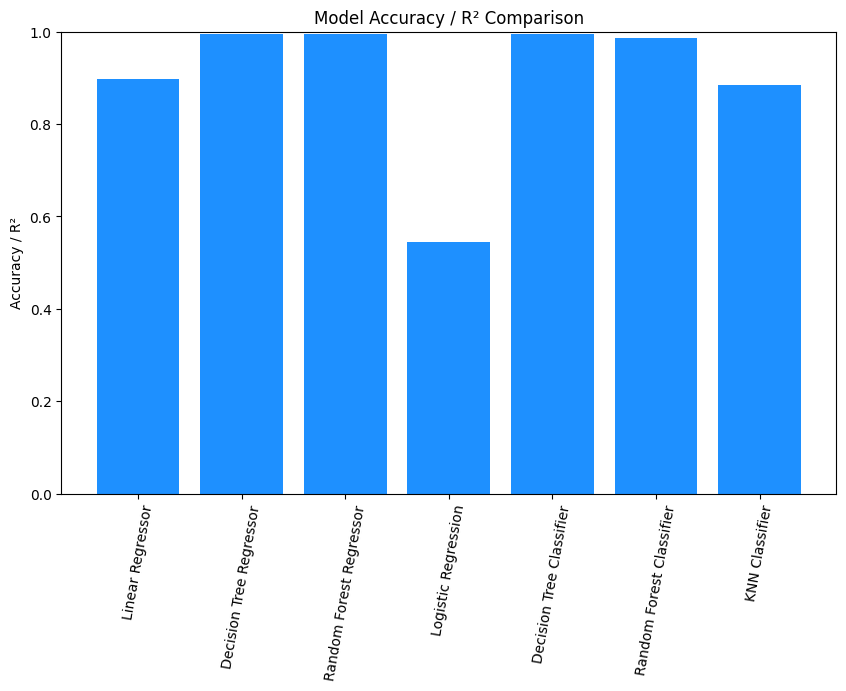

In [ ]:


model = LinearRegression()
model.fit(X_train, Y_train)

DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)

RF = RandomForestRegressor()
RF.fit(X_train, Y_train)

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

log_reg = LogisticRegression().fit(X_train2, Y_train2)
DT2 = DecisionTreeClassifier().fit(X_train2, Y_train2)
RF2 = RandomForestClassifier().fit(X_train2, Y_train2)
KNN = KNeighborsClassifier().fit(X_train2, Y_train2)

# Collect test set performance (R^2 for regressors, accuracy for classifiers)
scores = [
    model.score(X_test, Y_test),                           # Linear Regressor
    DT.score(X_test, Y_test),                              # Decision Tree Regressor
    RF.score(X_test, Y_test),                              # Random Forest Regressor
    accuracy_score(Y_test2, log_reg.predict(X_test2)),     # Logistic Regression
    accuracy_score(Y_test2, DT2.predict(X_test2)),         # Decision Tree Classifier
    accuracy_score(Y_test2, RF2.predict(X_test2)),         # Random Forest Classifier
    accuracy_score(Y_test2, KNN.predict(X_test2)),         # KNN Classifier
]

# Model labels
model_labels = [
    'Linear Regressor',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Logistic Regression',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'KNN Classifier'
]

# Bar plot
plt.figure(figsize=(10,6))
plt.bar(model_labels, scores, color='dodgerblue')
plt.ylabel('Accuracy / R²')
plt.title('Model Accuracy / R² Comparison')
plt.xticks(rotation=80)
plt.ylim(0, 1)
plt.show()


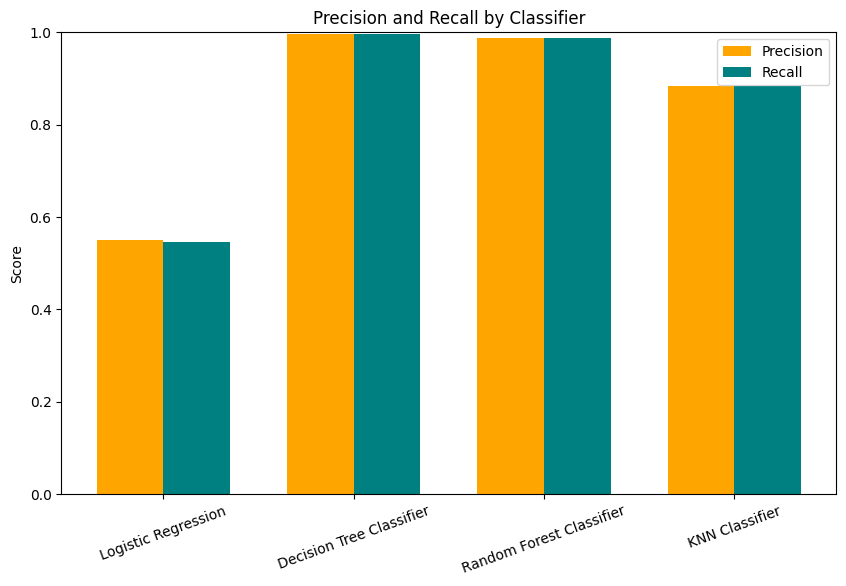

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Precision and recall for classifiers on the test set
logistic_prec = precision_score(Y_test2, log_reg.predict(X_test2), average='weighted')
logistic_recall = recall_score(Y_test2, log_reg.predict(X_test2), average='weighted')

dtc_prec = precision_score(Y_test2, DT2.predict(X_test2), average='weighted')
dtc_recall = recall_score(Y_test2, DT2.predict(X_test2), average='weighted')

rfc_prec = precision_score(Y_test2, RF2.predict(X_test2), average='weighted')
rfc_recall = recall_score(Y_test2, RF2.predict(X_test2), average='weighted')

knn_prec = precision_score(Y_test2, KNN.predict(X_test2), average='weighted')
knn_recall = recall_score(Y_test2, KNN.predict(X_test2), average='weighted')


# Model names and their metric values (replace with your actual values if needed)
models = [
    "Logistic Regression",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "KNN Classifier"
]
precision = [logistic_prec, dtc_prec, rfc_prec, knn_prec]
recall = [logistic_recall, dtc_recall, rfc_recall, knn_recall]
x = np.arange(len(models))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, precision, width, label='Precision', color='orange')
rects2 = ax.bar(x + width/2, recall, width, label='Recall', color='teal')

ax.set_ylabel('Score')
ax.set_title('Precision and Recall by Classifier')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_ylim(0, 1)
ax.legend()

plt.show()


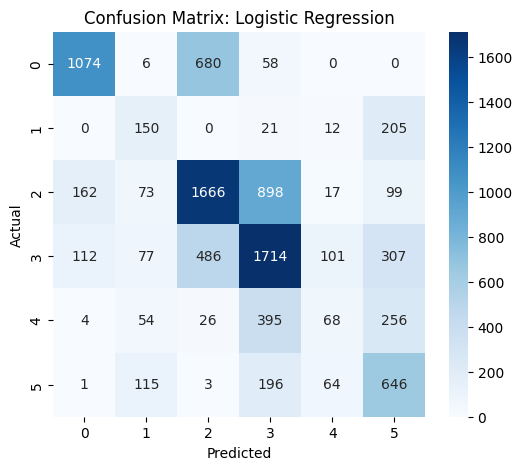

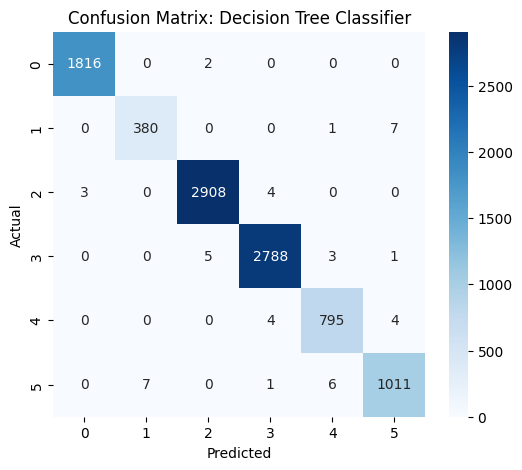

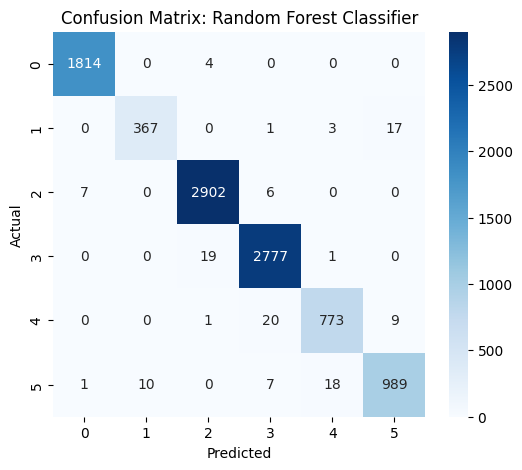

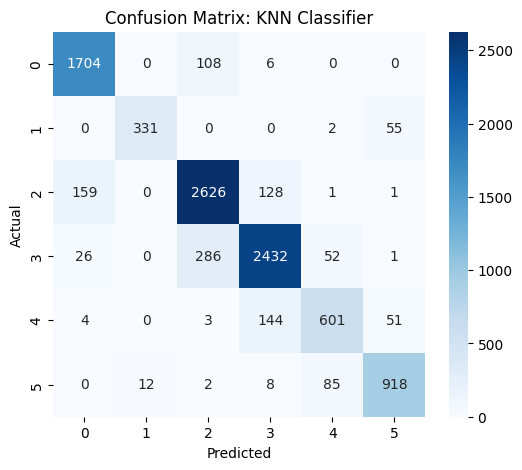

In [ ]:
classifier_names = [
    "Logistic Regression",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "KNN Classifier"
]
classifiers = [
    log_reg,
    DT2,
    RF2,
    KNN
]
X_tests = [X_test2] * 4  # assuming X_test2 is used for all

for clf_name, clf, X_test in zip(classifier_names, classifiers, X_tests):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(Y_test2, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {clf_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


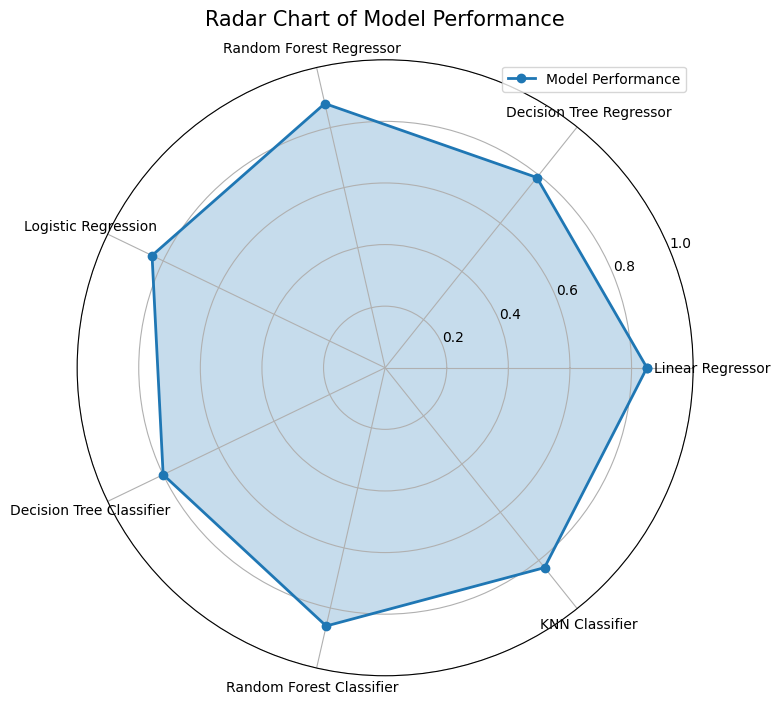

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their metric (accuracy or R²)
models = [
    'Linear Regressor',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Logistic Regression',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'KNN Classifier'
]
scores = [0.85, 0.79, 0.88, 0.84, 0.80, 0.86, 0.83]  # Replace these with your actual values

# Radar chart setup
labels = np.array(models)
stats = np.array(scores)
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats, [stats[0]]))
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
ax.plot(angles, stats, 'o-', linewidth=2, label='Model Performance')
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles[:-1]*180/np.pi, labels)
ax.set_title('Radar Chart of Model Performance',pad=25, fontsize=15)
ax.grid(True)
ax.set_ylim(0, 1)
plt.legend(loc='best')
plt.show()


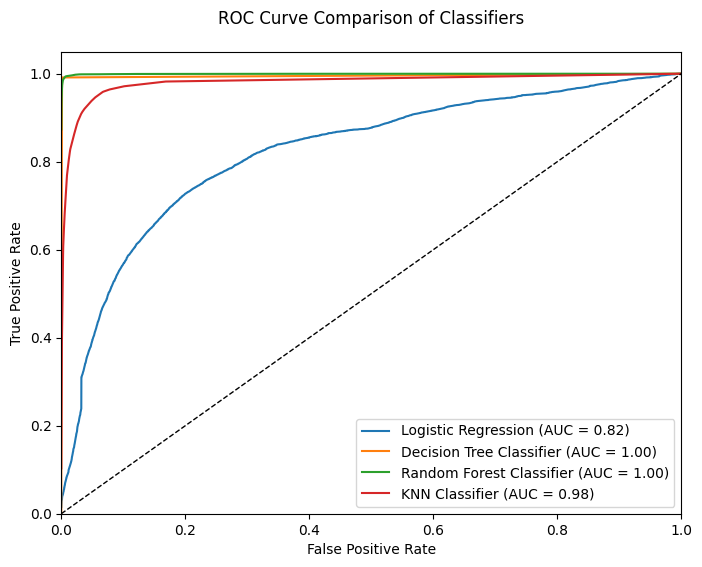

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# One-hot encode targets for multi-class ROC/AUC
lb = LabelBinarizer()
Y_test2_bin = lb.fit_transform(Y_test2)

classifiers = [
    (log_reg, "Logistic Regression"),
    (DT2, "Decision Tree Classifier"),
    (RF2, "Random Forest Classifier"),
    (KNN, "KNN Classifier"),
]

plt.figure(figsize=(8,6))

for clf, label in classifiers:
    if hasattr(clf, 'predict_proba'):
        y_score = clf.predict_proba(X_test2)
    else: # e.g., KNN for multi-class may have to use decision_function or adapt
        y_score = clf.predict_proba(X_test2)

    # For multi-class, calculate ROC for each class and average (macro)
    n_classes = Y_test2_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test2_bin[:,i], y_score[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Macro-average: concatenate all FPR and TPR, sort and interpolate
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    plt.plot(all_fpr, mean_tpr, label=f'{label} (AUC = {np.mean([roc_auc[i] for i in range(n_classes)]):.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Classifiers', pad=20)
plt.legend(loc="lower right")
plt.show()
